In [1]:
import pandas as pd
import numpy as np

In [2]:
X_tr = pd.read_csv('house-prices-advanced-regression-techniques/housing_prices_advanced_train.csv')

In [3]:
X_test = pd.read_csv('house-prices-advanced-regression-techniques/housing_prices_advanced_test.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X_train = X_tr.iloc[:,0:-1]
y_train = X_tr.iloc[:,-1]

In [7]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
X_train.shape, y_train.shape

((1460, 80), (1460,))

In [9]:
y_te = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [10]:
y_test = y_te.iloc[:,-1]

In [11]:
y_test

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [12]:
X_test.shape

(1459, 80)

In [13]:
y_test.shape

(1459,)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
X_train.isnull().sum().to_frame()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [17]:
X_train.isnull().mean()[X_train.isnull().mean() !=0] * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [18]:
X_test.isnull().mean()[X_test.isnull().mean() != 0] * 100

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### first finding out that in training data and in testing data which columns are numerical and categorical

In [20]:
missing_col_training_data = X_train.isnull().sum()[X_train.isnull().sum() !=0].keys()
missing_col_training_data

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [21]:
numerical_miss_col_train = []
categorical_miss_col_train = []
for i in missing_col_training_data:
    if X_train[i].dtype in ['float64', 'int64']:
        numerical_miss_col_train.append(i)
    else:
        categorical_miss_col_train.append(i)
print(numerical_miss_col_train)
print(categorical_miss_col_train)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


##### Here first checking what percentage of these coloumns values are missing and then plotting those values

In [22]:
X_train[numerical_miss_col_train].isnull().mean()*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

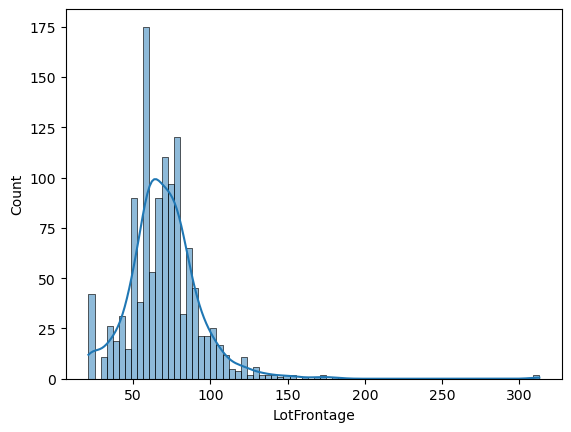

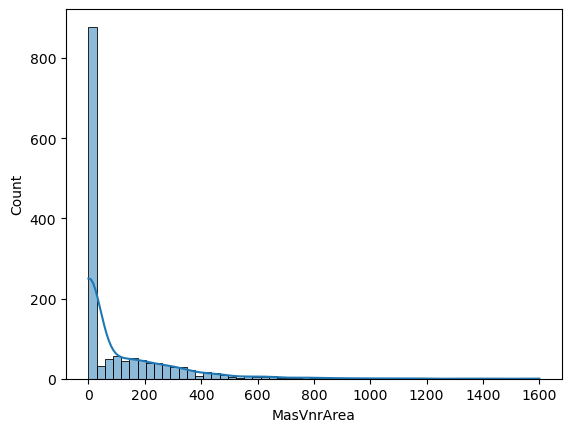

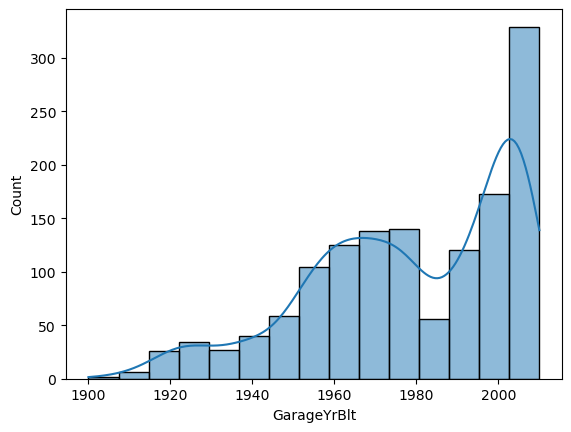

In [23]:
for i in numerical_miss_col_train:
    sns.histplot(X_train[i], kde=True)
    plt.show();

### What I really wanted to do here:-

#### I wanted to create a pipeline in which I fill in the values and that pipeline is going to use an imputation method(mean/median or KNN) and then check if the variance of the column changes or not and then another pipeline which is going to apply a machine learning algorithm and gave us the result.

In [24]:
### calculating categorical and numerical columns in testing data 

In [25]:
# first finding all the missing column in testing dataset

In [26]:
pd.reset_option('display.max_rows')

In [27]:
X_test.isnull().sum()[X_test.isnull().sum() != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [28]:
missing_col_testing_data = X_test.isnull().sum()[X_test.isnull().sum() != 0].keys()

In [29]:
numerical_miss_col_test= []
categorical_miss_col_test = []
for i in missing_col_testing_data:
    if X_test[i].dtype in ['float64', 'int64']:
        numerical_miss_col_test.append(i)
    else:
        categorical_miss_col_test.append(i)
print(numerical_miss_col_test)
print(categorical_miss_col_test)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


#### let's create a pipeline which first take columns from X-test and then go to the X-train dataset and then find out the mean of that column and then fill the missing values in the X-test data
#### for this first we have to create a pipeline which does the simpleimputing and then a columntransformer which  take that simple imputer pipeline and take numerical columns. then in the columntransformer we have to fit the X-train data.
#### So it will find the mean and then apply simple imputer on those numerical columns which we specify.
#### at last we have to transform the X-test dataset

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
X_test2 = X_test.copy()

In [32]:
numerical_pipeline = Pipeline(steps=[
        ('finding_mean', SimpleImputer(strategy='mean'))]
)

In [33]:
numerical_preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_miss_col_test)
], remainder='passthrough'    
)

### when we use [remainder='passthrough'] and so for all the column on which it's not applying any strategy they are kept unchanged and the order is also the same and they are added at the last of the dataframe. First we have those columns which are changed during the process of ColumnTransformer

In [34]:
numerical_preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('finding_mean',
                                                  SimpleImputer())]),
                                 ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
                                  'GarageCars', 'GarageArea'])])

In [35]:
X_test.drop(columns=numerical_miss_col_test).columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleT

In [36]:
test_transformed_column = list(numerical_miss_col_test) + list(X_test.drop(columns=numerical_miss_col_test).columns)
# test_transformed_column

In [37]:
X_test2 = pd.DataFrame(numerical_preprocessor.transform(X_test2), columns=test_transformed_column)

In [38]:
X_test2

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.0,2.0,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.0,2.0,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,1978.506164,0.0,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,1978.506164,0.0,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#### here the names of all the columns are removed from the X-test data and I don't want that instead I wanted to create a new dataset which has all the columns names it which was there earlier

##### Now checking if the variance changed for those affected columns in X-test data

In [39]:
for i in numerical_miss_col_test:
    print('original',X_test[i].var(),'changed', X_test2[i].var())

original 500.72302570500074 changed 423.04802847962566
original 31550.960387619692 changed 31226.45221728285
original 207268.99004804334 changed 207126.8437344352
original 31241.950401212536 changed 31220.54770544294
original 191196.73245191618 changed 191065.71101042294
original 196159.1912897675 changed 196024.73907484513
original 0.2815868071530461 changed 0.281200656406289
original 0.06374022340048285 changed 0.06365286880193456
original 698.6070060552601 changed 661.2641688348448
original 0.602090753403697 changed 0.6016777974754197
original 47110.099592525694 changed 47077.788169353065


#### Also checking if the distribution is changed as well

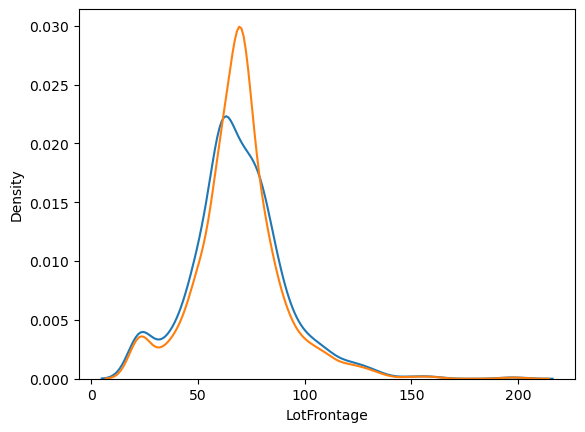

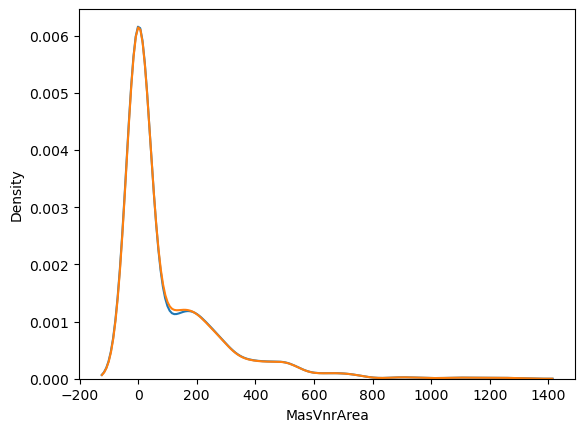

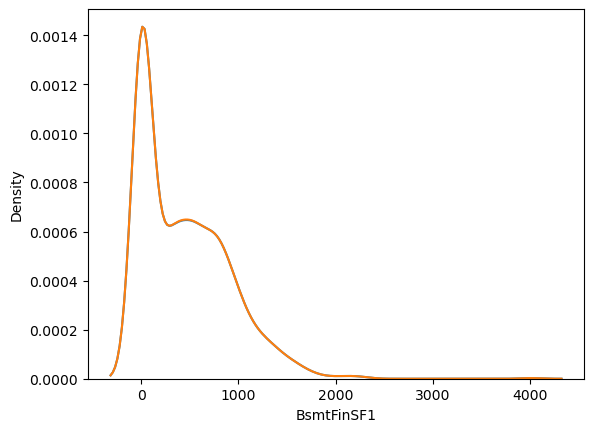

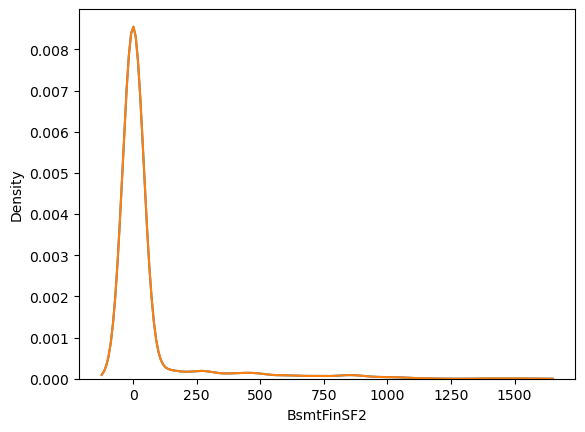

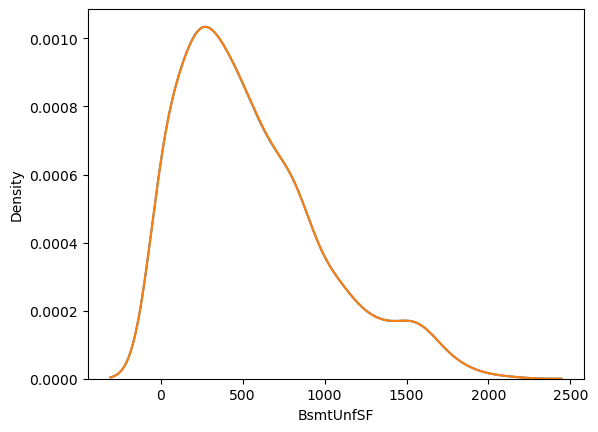

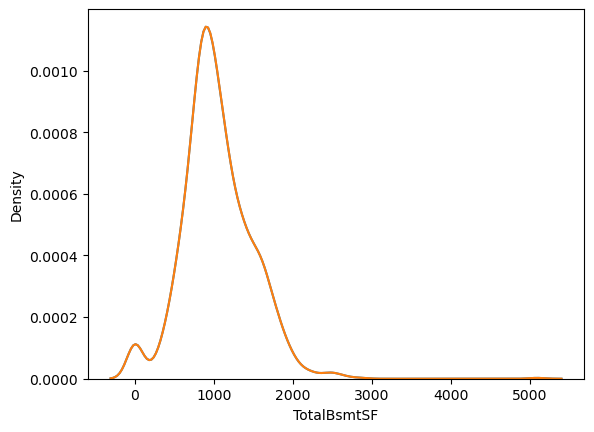

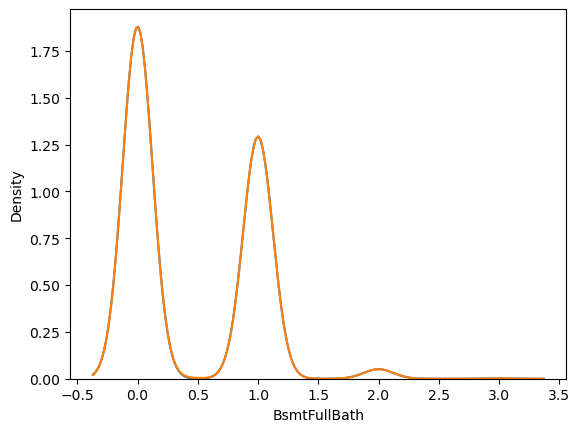

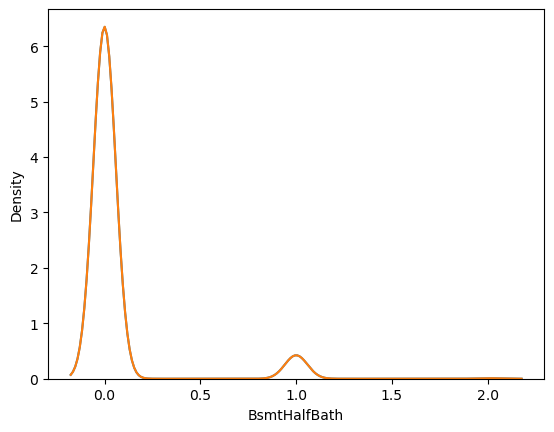

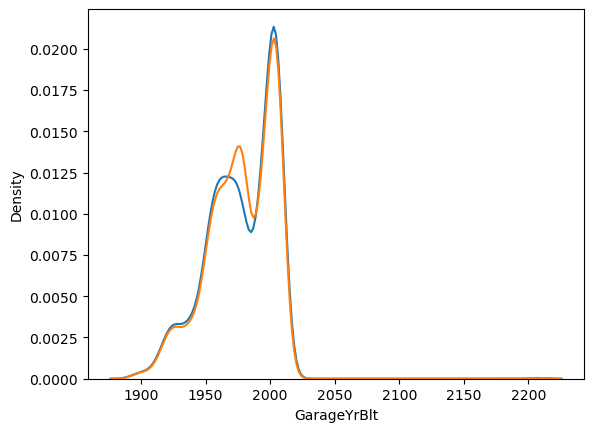

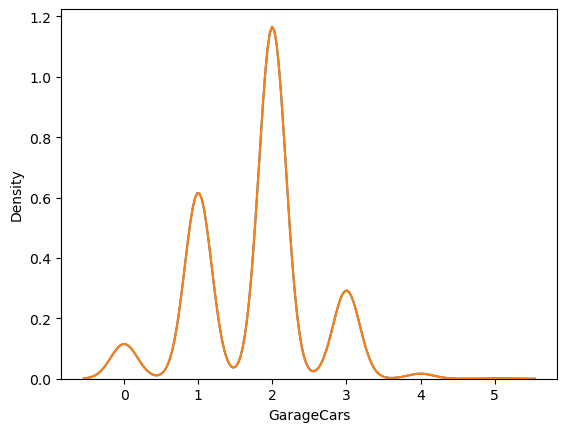

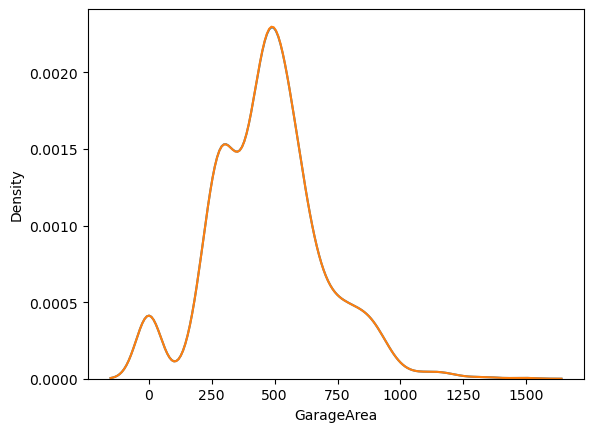

In [40]:
for i in numerical_miss_col_test:
    sns.kdeplot(X_test[i])
    sns.kdeplot(X_test2[i])
    plt.show();

#### for LotFrontage, GarageYrBlt we have to find something else cause both variance and distribution changes

### Now let's do the same for X_train in numerical columns

In [41]:
numerical_miss_col_train

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [42]:
X_train2 = X_train.copy()

In [43]:
numerical_pipeline2 = Pipeline(steps=[
        ('finding_mean', SimpleImputer(strategy='mean'))]
)

numerical_preprocessor2 = ColumnTransformer(transformers=[
    ('num', numerical_pipeline2, numerical_miss_col_train)
], remainder='passthrough'    
)

In [44]:
train_transformed_col = list(numerical_miss_col_train) + list(X_train.drop(columns=numerical_miss_col_train).columns)

In [45]:
X_train2 = pd.DataFrame(numerical_preprocessor2.fit_transform(X_train2), columns=train_transformed_col)

#### now checking if the variance and distribution changes in the affected columns in X_train data

In [46]:
# first checking the variance of all the numerical columns

for i in numerical_miss_col_train:
    print('original', X_train[i].var(), 'after', X_train2[i].var())



original 589.7491687482642 after 485.05757539267887
original 32784.971167885175 after 32605.204362303324
original 609.5825091487371 after 575.7400257758476


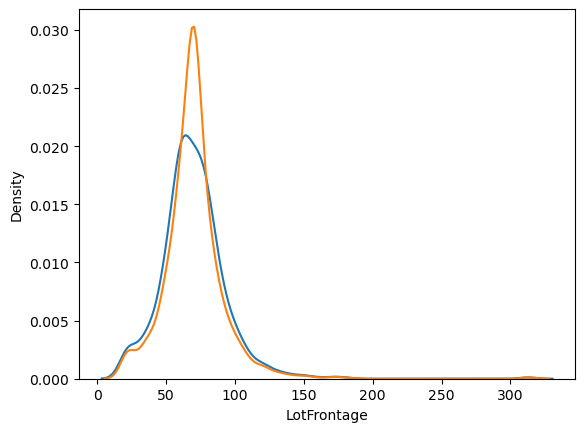

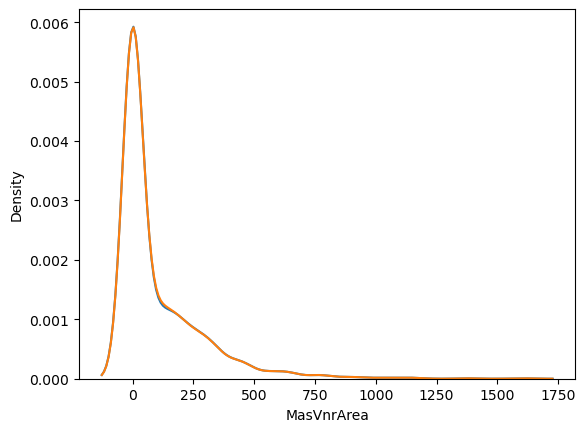

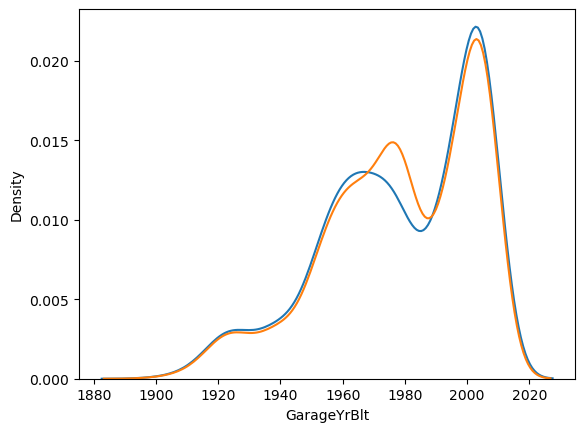

In [47]:
for i in numerical_miss_col_train:
    sns.kdeplot(X_train[i])
    sns.kdeplot(X_train2[i])
    plt.show()

In [48]:
# should find something else for LotFrontage because the distribution looks different and also the variance as well

##### Now there are no missing values in training and testing data in numerical columns

In [49]:
X_train2[numerical_miss_col_train].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [50]:
X_test2[numerical_miss_col_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

#### Now lets do something for the missing columns in training data

In [51]:
# there could be some columns in both training and testing where data is missing for same column 

In [52]:
categorical_miss_col_test

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [53]:
categorical_miss_col_train

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [54]:
common_columns = []

for i in categorical_miss_col_train:
    if i in categorical_miss_col_test:
        common_columns.append(i)
        
common_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [55]:
len(common_columns)

15

In [56]:
X_train2[categorical_miss_col_train].isnull().mean()*100

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [57]:
X_test[categorical_miss_col_test].isnull().mean()*100

MSZoning         0.274160
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [58]:
# there are some columns which has more than 80% of missing data.
# for these type of columns the easiest part is to just remove these columns

# other method is to use some advanced imputation techniques like multiple imputation or machine-learning based imputation
#

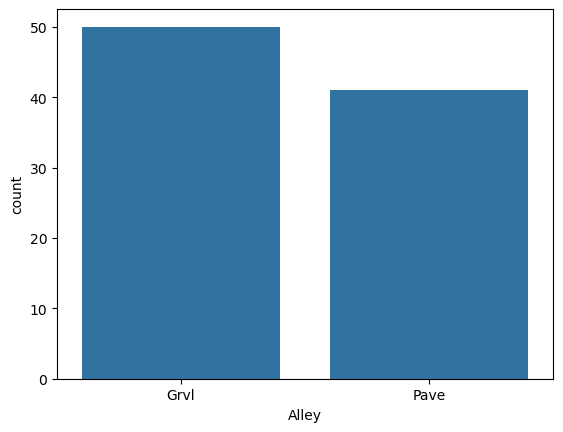

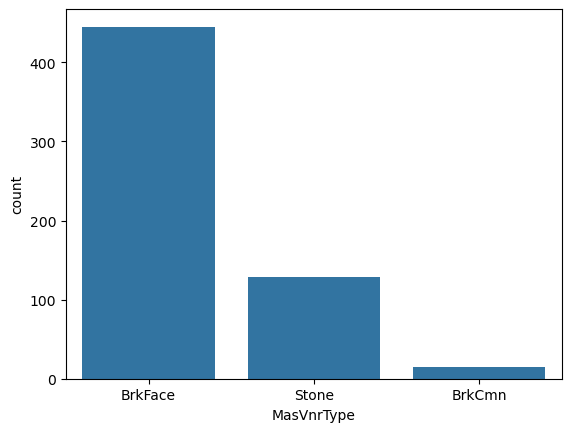

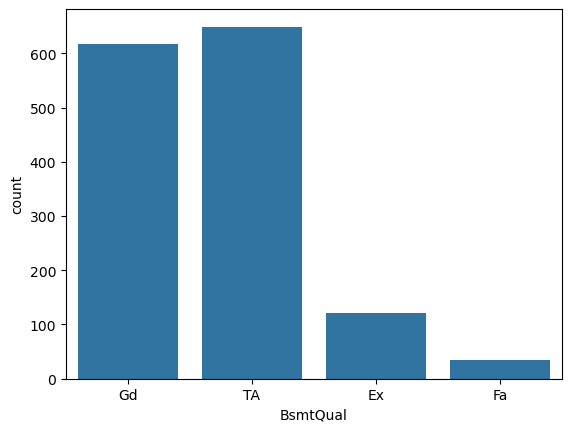

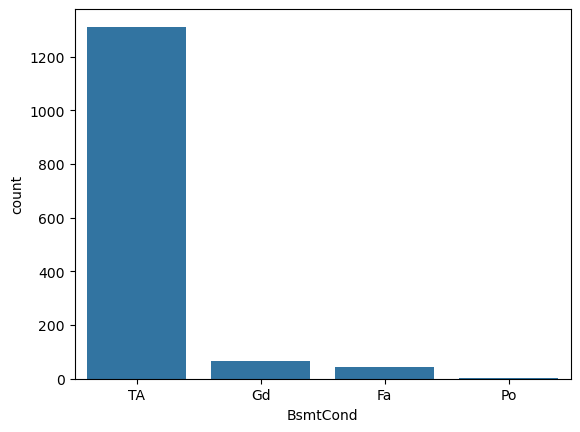

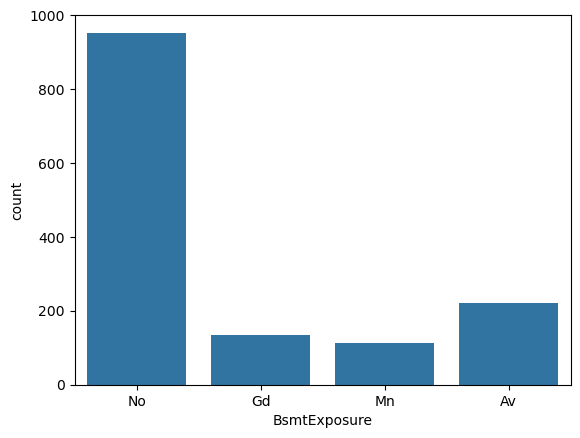

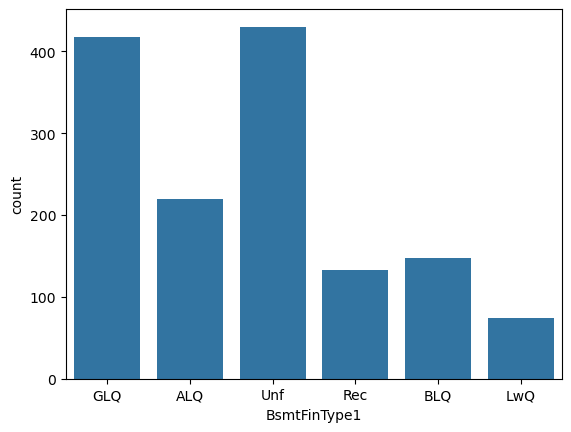

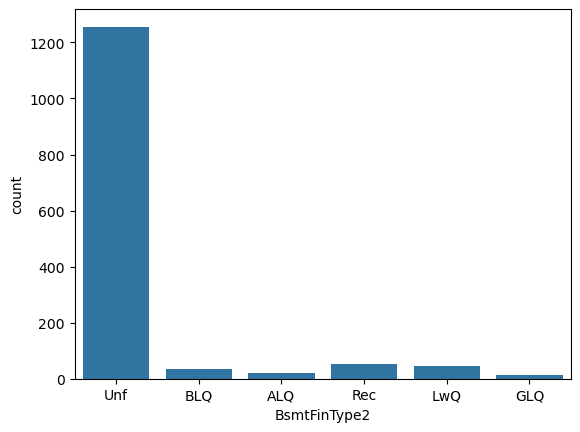

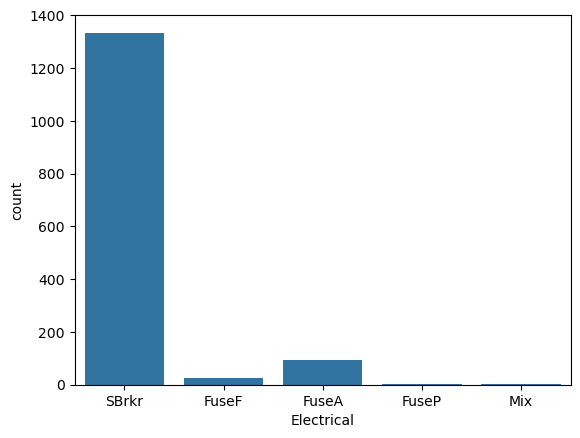

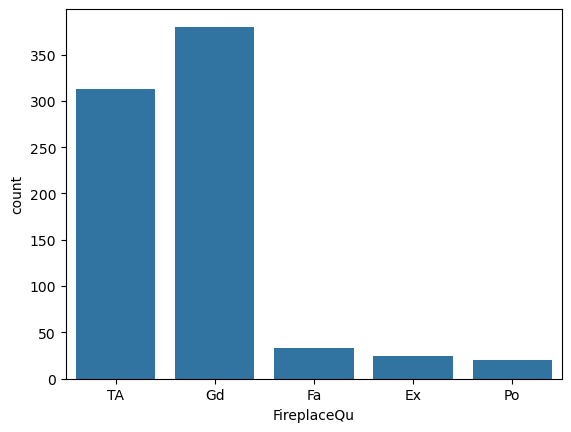

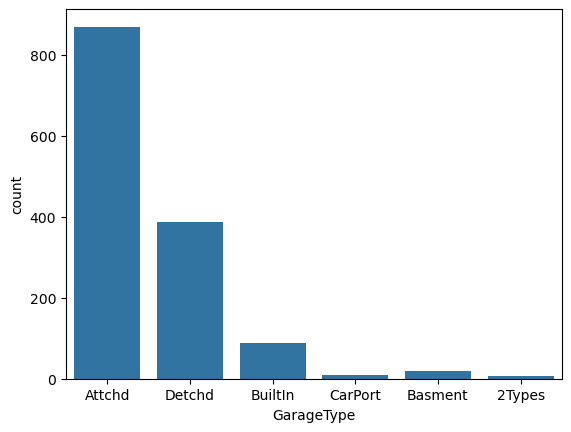

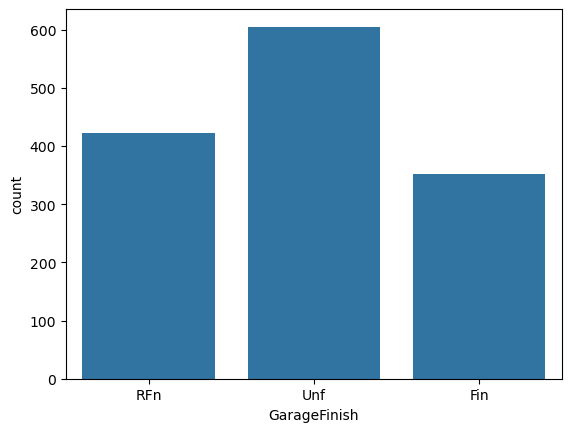

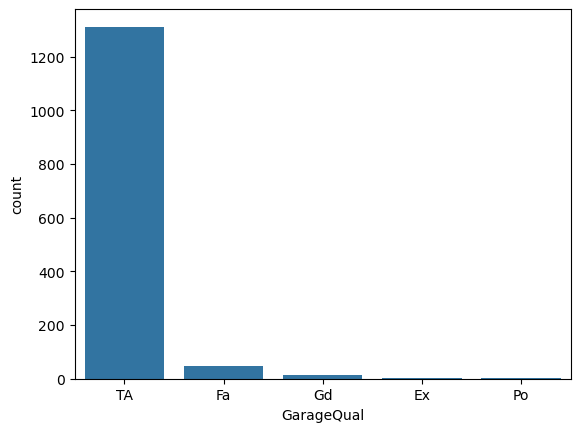

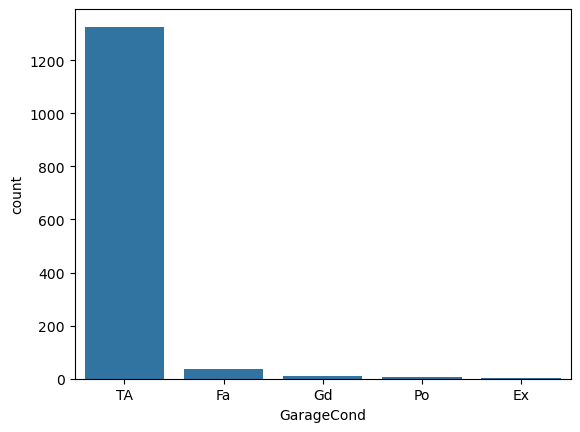

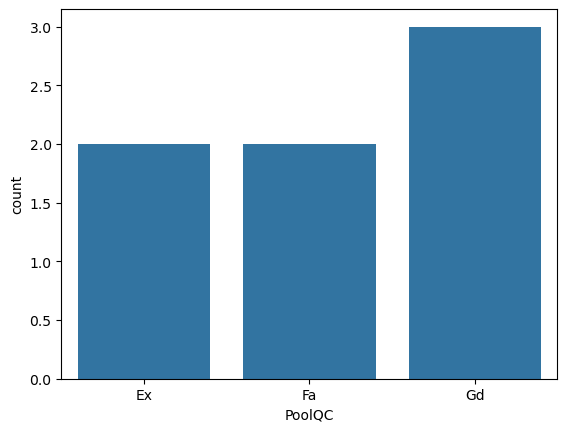

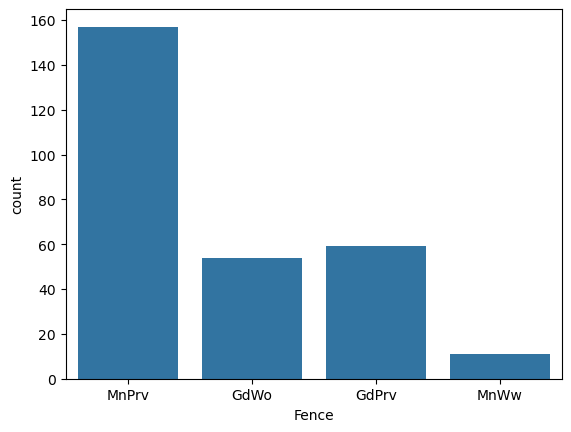

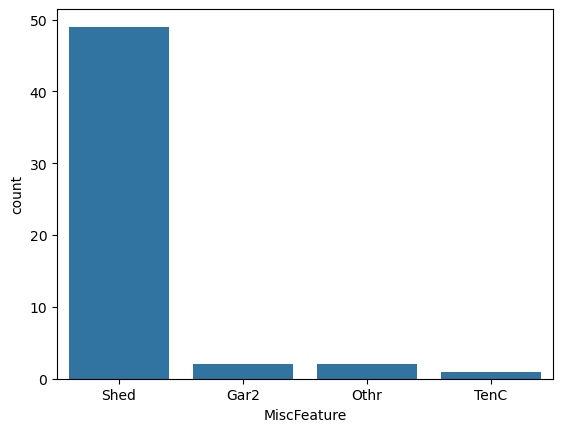

In [59]:
for i in categorical_miss_col_train:
    sns.countplot(x=X_train2[i])
    plt.show();

In [60]:
### there are some things which we have to remember while handling missing values

### first thing is dropping columns
     ###  sometimes even the column which has 0 missing values we still drop that column during feature selection
    ### there could be some column which has a lot of missing values but it plays a significant role in predicting the value of target column
       ### so dropping that column might not be a good idea
        
        
   ### so in the end it all depends on one thing ***WHAT PERFORMS THE BEST***

In [61]:
### in our case applying most_frequent imputation for those columns which has really less missing values


### for those columns which has a lot of missing missing values in our case >40%, for these columns we can use
### two methods first is using KNN imputer and second one is filling those missing values with random values

In [62]:
X_train2[categorical_miss_col_train].isnull().mean()*100

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [63]:
X_test2[categorical_miss_col_test].isnull().mean()*100

MSZoning         0.274160
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [64]:
### let's create a pipeline to fill those missing values

In [65]:
### before doing this first let's separate those missing col. in two parts

In [66]:
X_test2.isnull().mean()[X_test2.isnull().mean() > 0.1]

Alley          0.926662
MasVnrType     0.612748
FireplaceQu    0.500343
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64

In [67]:
cat_test_more = X_test2[categorical_miss_col_test].isnull().mean()[
                                           X_test2[categorical_miss_col_test].isnull().mean() > 0.1].keys()

In [68]:
cat_test_more

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [69]:
cat_test_less = X_test2.isnull().mean()[(X_test2.isnull().mean() > 0) & (X_test2.isnull().mean() < 0.1)].keys()

In [70]:
cat_test_less

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [71]:
X_test2.isnull().mean()[(X_test2.isnull().mean() > 0) & (X_test2.isnull().mean() < 0.1)].keys()

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [72]:
# for less missing values we will fill it with most frequent value

# for more missing values we will fill it either with random value or maybe use KNN imputer

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [74]:
## first we will do it for training data

In [75]:
## here what we will do is first find out all the categorical column which has zero missing values
## then we will find those less missing values column
## and apply transformation



In [76]:
# we can apply one hot encoding to all the columns

In [77]:
# for most_frequent we will do in first step

# in second step we will do it for only more missing values

In [78]:
# let's find out the column for less and rest of the categorical column

In [79]:
pd.set_option('display.max_rows', None)

In [80]:
# this gives us all the column in training data where no. of missing value is less

cat_train_less = X_train2[categorical_miss_col_train].isnull().mean()[
    (X_train2[categorical_miss_col_train].isnull().mean() < .1) 
    & (X_train2[categorical_miss_col_train].isnull().mean() > 0)].keys()


cat_train_more = X_train2[categorical_miss_col_train].isnull().mean()[
    (X_train2[categorical_miss_col_train].isnull().mean() > .1)].keys()

In [81]:
pd.reset_option('display.max_rows')

In [82]:
# these are all the columns which are categorical in nature and doesn't have any null values

cat_train_non_null = X_train.drop(columns=list(cat_train_less)+list(cat_train_more)).select_dtypes(include=['object']).columns
cat_train_non_null

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
X_train2.drop(columns=list(cat_train_less)+list(cat_train_more))

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,196.0,2003.0,1,60,RL,8450,Pave,Reg,Lvl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,80.0,0.0,1976.0,2,20,RL,9600,Pave,Reg,Lvl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,68.0,162.0,2001.0,3,60,RL,11250,Pave,IR1,Lvl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,60.0,0.0,1998.0,4,70,RL,9550,Pave,IR1,Lvl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,84.0,350.0,2000.0,5,60,RL,14260,Pave,IR1,Lvl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1999.0,1456,60,RL,7917,Pave,Reg,Lvl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,85.0,119.0,1978.0,1457,20,RL,13175,Pave,Reg,Lvl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,66.0,0.0,1941.0,1458,70,RL,9042,Pave,Reg,Lvl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,68.0,0.0,1950.0,1459,20,RL,9717,Pave,Reg,Lvl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [84]:
# we should use labelencoding for all the categorical colummns

# it will take care of even null values as well

# and then in the end we will convert it back to categorical values

In [85]:
categorical_pipeline1 = Pipeline(steps=[
        ('finding_mode', SimpleImputer(strategy='most_frequent'))
])

col_train_1_less = list(cat_train_less) + list(cat_train_non_null)

categorical_preprocessor1 = ColumnTransformer(transformers=[
    ('cat_less', categorical_pipeline1, cat_train_less)
], remainder='passthrough')

In [86]:
# get_feature_names_out, will use this to get the features name back

In [87]:
X_train2[cat_train_less]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
1456,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA
1457,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1458,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA


In [88]:
col_for_xtrain2_after_filling_less = list(cat_train_less) + list(X_train2.drop(columns=cat_train_less).columns)
col_for_xtrain2_after_filling_less

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [89]:
X_train2[col_for_xtrain2_after_filling_less].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [90]:


X_train2 = pd.DataFrame(categorical_preprocessor1.fit_transform(X_train2), columns=col_for_xtrain2_after_filling_less)

In [91]:
X_train2.isnull().sum()[X_train2.isnull().sum() != 0]

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

##### Now there are only 6 columns in training data which have some missing values and these columns are the ones which have lots of missing values in it

In [92]:
# for these columns we can use for loop and use labelencoding and then we can use KNN imputer and then 
# reverse back the changes 

## and in the end we can think about something else or you use the data for filling missing values in testing set

In [93]:
categorical_preprocessor1.get_feature_names_out()

array(['cat_less__BsmtQual', 'cat_less__BsmtCond',
       'cat_less__BsmtExposure', 'cat_less__BsmtFinType1',
       'cat_less__BsmtFinType2', 'cat_less__Electrical',
       'cat_less__GarageType', 'cat_less__GarageFinish',
       'cat_less__GarageQual', 'cat_less__GarageCond',
       'remainder__LotFrontage', 'remainder__MasVnrArea',
       'remainder__GarageYrBlt', 'remainder__Id', 'remainder__MSSubClass',
       'remainder__MSZoning', 'remainder__LotArea', 'remainder__Street',
       'remainder__Alley', 'remainder__LotShape',
       'remainder__LandContour', 'remainder__Utilities',
       'remainder__LotConfig', 'remainder__LandSlope',
       'remainder__Neighborhood', 'remainder__Condition1',
       'remainder__Condition2', 'remainder__BldgType',
       'remainder__HouseStyle', 'remainder__OverallQual',
       'remainder__OverallCond', 'remainder__YearBuilt',
       'remainder__YearRemodAdd', 'remainder__RoofStyle',
       'remainder__RoofMatl', 'remainder__Exterior1st',
       're

In [94]:
## for less missing values, we have to use most_frequent strategy so in that case there is no need of 
## onehotencoding

In [95]:
## In KNN imputer we have to provide n_neighbors which finds the most closest rows similar to that row.
## let's take an example where value is 2, so it will try to find the 2 closest similar rows which represents the
## data we have to find

In [96]:
## In iterative approach, it will use a regression model and then predicts the value which is missing
## here we can select any regression model if not specified it will select randomly

In [97]:
## One problem with both of these imputers is they only work on numerical data and not categorical data

## so first we have to convert everything to numerical data

## we will use OneHotEncoding for this

##### for missing value it will create a separate column and that column value is fill with 1

In [98]:
X_train3 = X_train2.copy()
X_train3

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [99]:
X_train3.isnull().sum()[X_train3.isnull().sum() != 0]

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [100]:
X_train3[cat_train_more].head()

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,NaN,NaN,NaN,NaN
1,NaN,NaN,TA,NaN,NaN,NaN
2,NaN,BrkFace,TA,NaN,NaN,NaN
3,NaN,NaN,Gd,NaN,NaN,NaN
4,NaN,BrkFace,TA,NaN,NaN,NaN


In [101]:
for i in cat_train_more:
    print(i)

Alley
MasVnrType
FireplaceQu
PoolQC
Fence
MiscFeature


In [121]:
## so here we will print two things
### first is the column name and the other is index and the class label
### and we can print all these things in a single line

In [124]:
label_encoders = {}
for col in cat_train_more:
    le = LabelEncoder()
    X_train3[col] = le.fit_transform(X_train3[col].astype(str))
    label_encoders[col] = le
    for index, class_label in enumerate(le.classes_):
        print(col, index, class_label)

Alley 0 Grvl
Alley 1 Pave
Alley 2 nan
MasVnrType 0 BrkCmn
MasVnrType 1 BrkFace
MasVnrType 2 Stone
MasVnrType 3 nan
FireplaceQu 0 Ex
FireplaceQu 1 Fa
FireplaceQu 2 Gd
FireplaceQu 3 Po
FireplaceQu 4 TA
FireplaceQu 5 nan
PoolQC 0 Ex
PoolQC 1 Fa
PoolQC 2 Gd
PoolQC 3 nan
Fence 0 GdPrv
Fence 1 GdWo
Fence 2 MnPrv
Fence 3 MnWw
Fence 4 nan
MiscFeature 0 Gar2
MiscFeature 1 Othr
MiscFeature 2 Shed
MiscFeature 3 TenC
MiscFeature 4 nan


In [125]:
X_train3

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2,1,5,3,4,4,Gd,TA,No,GLQ,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,3,4,3,4,4,Gd,TA,Gd,ALQ,...,0,0,0,0,0,0,5,2007,WD,Normal
2,2,1,4,3,4,4,Gd,TA,Mn,GLQ,...,42,0,0,0,0,0,9,2008,WD,Normal
3,2,3,2,3,4,4,TA,Gd,No,ALQ,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,2,1,4,3,4,4,Gd,TA,Av,GLQ,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,3,4,3,4,4,Gd,TA,No,Unf,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,2,2,4,3,2,4,Gd,TA,No,ALQ,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,2,3,2,3,0,2,TA,Gd,No,GLQ,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,2,3,5,3,4,4,TA,TA,Mn,GLQ,...,0,112,0,0,0,0,4,2010,WD,Normal


In [104]:
for index, class_label in enumerate(le.classes_):
    print(index, class_label)

0 Gar2
1 Othr
2 Shed
3 TenC
4 nan


In [126]:
label_encoders

{'Alley': LabelEncoder(),
 'MasVnrType': LabelEncoder(),
 'FireplaceQu': LabelEncoder(),
 'PoolQC': LabelEncoder(),
 'Fence': LabelEncoder(),
 'MiscFeature': LabelEncoder()}

In [127]:
X_train3[cat_train_more].head()

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature
0,2,1,5,3,4,4
1,2,3,4,3,4,4
2,2,1,4,3,4,4
3,2,3,2,3,4,4
4,2,1,4,3,4,4


In [107]:
from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer

# from sklearn.experimental import enable_iterative_imputer

In [146]:
# first we try to replace these index value in particular column with NaN and then use Pipeline

# Alley 2 nan

# MasVnrType 3 nan

# FireplaceQu 5 nan

# PoolQC 3 nan

# Fence 4 nan

# MiscFeature 4 nan

X_train3.Alley.replace(2, np.nan, inplace=True)
X_train3.MasVnrType.replace(3, np.nan, inplace=True)
X_train3.FireplaceQu.replace(5, np.nan, inplace=True)
X_train3.PoolQC.replace(3, np.nan, inplace=True)
X_train3.Fence.replace(4, np.nan, inplace=True)
X_train3.MiscFeature.replace(4, np.nan, inplace=True)




In [150]:
X_train3[cat_train_more].isnull().sum()

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [151]:
X_train[cat_train_more].isnull().sum()

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [154]:
X_train3.MasVnrType.value_counts()

MasVnrType
1.0    445
2.0    128
0.0     15
Name: count, dtype: int64

In [155]:
categorical_pipeline2 = Pipeline(steps=[
        ('finding_similar_rows', KNNImputer(n_neighbors=5))
])


categorical_preprocessor2 = ColumnTransformer(transformers=[
    ('cat_less', categorical_pipeline2, cat_train_more),
], remainder='passthrough')

In [109]:
from sklearn.model_selection import GridSearchCV

In [156]:
categorical_preprocessor2.fit_transform(X_train3)

array([[0.6, 1.0, 3.0, ..., 2008, 'WD', 'Normal'],
       [0.6, 1.0, 4.0, ..., 2007, 'WD', 'Normal'],
       [0.6, 1.0, 4.0, ..., 2008, 'WD', 'Normal'],
       ...,
       [0.4, 1.4, 2.0, ..., 2010, 'WD', 'Normal'],
       [0.45054945054945056, 1.1921768707482994, 2.7337662337662336, ...,
        2010, 'WD', 'Normal'],
       [0.45054945054945056, 1.1921768707482994, 2.7337662337662336, ...,
        2008, 'WD', 'Normal']], dtype=object)

In [111]:
X_train3.drop(columns=cat_train_more).columns.shape

(74,)

In [157]:
col_for_xtrain2_after_filling_more = list(cat_train_more) + list(X_train3.drop(columns=cat_train_more).columns)

X_train3 = pd.DataFrame(categorical_preprocessor2.fit_transform(X_train3), columns=col_for_xtrain2_after_filling_more)

In [158]:
X_train3

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.6,1.0,3.0,0.8,1.8,2.0,Gd,TA,No,GLQ,...,61,0,0,0,0,0,2,2008,WD,Normal
1,0.6,1.0,4.0,1.4,1.0,2.0,Gd,TA,Gd,ALQ,...,0,0,0,0,0,0,5,2007,WD,Normal
2,0.6,1.0,4.0,1.4,1.0,1.6,Gd,TA,Mn,GLQ,...,42,0,0,0,0,0,9,2008,WD,Normal
3,0.4,1.2,2.0,1.4,1.2,1.8,TA,Gd,No,ALQ,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,0.6,1.0,4.0,1.4,1.0,1.6,Gd,TA,Av,GLQ,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.6,1.0,4.0,1.4,1.0,2.0,Gd,TA,No,Unf,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,0.4,2.0,4.0,1.4,2.0,1.6,Gd,TA,No,ALQ,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,0.4,1.4,2.0,1.4,0.0,2.0,TA,Gd,No,GLQ,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,0.450549,1.192177,2.733766,1.142857,1.427046,1.907407,TA,TA,Mn,GLQ,...,0,112,0,0,0,0,4,2010,WD,Normal


In [114]:
cat_train_more

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
# Alley 2 nan

# MasVnrType 3 nan

# FireplaceQu 5 nan

# PoolQC 3 nan

# Fence 4 nan

# MiscFeature 4 nan

#### reversing the label encoding on the columns which had a lot of missing values

In [159]:
for i in cat_train_more:
    le = label_encoders[i]
    X_train3[i] = le.inverse_transform(X_train3[i].astype(int))

In [160]:
X_train3

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Grvl,BrkFace,Po,Ex,GdWo,Shed,Gd,TA,No,GLQ,...,61,0,0,0,0,0,2,2008,WD,Normal
1,Grvl,BrkFace,TA,Fa,GdWo,Shed,Gd,TA,Gd,ALQ,...,0,0,0,0,0,0,5,2007,WD,Normal
2,Grvl,BrkFace,TA,Fa,GdWo,Othr,Gd,TA,Mn,GLQ,...,42,0,0,0,0,0,9,2008,WD,Normal
3,Grvl,BrkFace,Gd,Fa,GdWo,Othr,TA,Gd,No,ALQ,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,Grvl,BrkFace,TA,Fa,GdWo,Othr,Gd,TA,Av,GLQ,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Grvl,BrkFace,TA,Fa,GdWo,Shed,Gd,TA,No,Unf,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,Grvl,Stone,TA,Fa,MnPrv,Othr,Gd,TA,No,ALQ,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,Grvl,BrkFace,Gd,Fa,GdPrv,Shed,TA,Gd,No,GLQ,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,Grvl,BrkFace,Gd,Fa,GdWo,Othr,TA,TA,Mn,GLQ,...,0,112,0,0,0,0,4,2010,WD,Normal


In [166]:
for i in cat_train_more:
    print(X_train3[i].value_counts(), X_train[i].value_counts())

Alley
Grvl    1419
Pave      41
Name: count, dtype: int64 Alley
Grvl    50
Pave    41
Name: count, dtype: int64
MasVnrType
BrkFace    1252
Stone       128
BrkCmn       80
Name: count, dtype: int64 MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
FireplaceQu
Gd    793
TA    313
Po    294
Fa     36
Ex     24
Name: count, dtype: int64 FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
PoolQC
Fa    1170
Ex     287
Gd       3
Name: count, dtype: int64 PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
GdWo     1226
MnPrv     158
GdPrv      65
MnWw       11
Name: count, dtype: int64 Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
Othr    742
Shed    715
Gar2      2
TenC      1
Name: count, dtype: int64 MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


In [117]:
# # Define a grid of parameters for GridSearchCV
# param_grid = {
#     'finding_similar_rows__n_neighbors': [3, 5, 7, 10]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(categorical_preprocessor2, param_grid, cv=3)

# # Fit the GridSearchCV
# grid_search.fit(X_train3)

# # Get the best number of neighbors
# best_n_neighbors = grid_search.best_params_['finding_similar_rows__n_neighbors']
# print(f"Best number of neighbors: {best_n_neighbors}")

### doing the same for testing data as well

#### Here we have do only for the categorical featues

In [185]:
cat_test_less

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [186]:
cat_test_more

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [180]:
X_test2[numerical_miss_col_test].isnull().sum()[X_test2[numerical_miss_col_test].isnull().sum() !=0]

Series([], dtype: int64)

In [187]:
X_test2[categorical_miss_col_test].isnull().sum()[X_test2[categorical_miss_col_test].isnull().sum() !=0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
### first doing for those columns which have less missing values

In [ ]:
# X_train2.drop(columns=list(cat_train_less)+list(cat_train_more))

In [210]:
categorical_pipeline3 = Pipeline(steps=[
        ('finding_mode', SimpleImputer(strategy='most_frequent'))
])


categorical_preprocessor3 = ColumnTransformer(transformers=[
    ('cat_less', categorical_pipeline1, cat_test_less)
], remainder='passthrough')

In [211]:
X_test3 = X_test2.copy()

In [212]:
X_test3[cat_test_less].isnull().sum()[X_test3[cat_test_less].isnull().sum() !=0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

# X_train3 is the final training data

In [213]:
X_train3.isnull().sum()[X_train3.isnull().sum() !=0]

Series([], dtype: int64)

In [214]:
categorical_preprocessor3.fit(X_train3)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_less',
                                 Pipeline(steps=[('finding_mode',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object'))])

In [215]:
categorical_preprocessor3.transform(X_test3)

array([['RH', 'AllPub', 'VinylSd', ..., 6, 2010, 'Normal'],
       ['RL', 'AllPub', 'Wd Sdng', ..., 6, 2010, 'Normal'],
       ['RL', 'AllPub', 'VinylSd', ..., 3, 2010, 'Normal'],
       ...,
       ['RL', 'AllPub', 'VinylSd', ..., 9, 2006, 'Abnorml'],
       ['RL', 'AllPub', 'HdBoard', ..., 7, 2006, 'Normal'],
       ['RL', 'AllPub', 'HdBoard', ..., 11, 2006, 'Normal']], dtype=object)

In [216]:
col_for_xtest_after_filling_less = list(cat_test_less) + list(X_test3.drop(columns=cat_test_less).columns)
len(col_for_xtest_after_filling_less)

80

In [217]:


X_test3 = pd.DataFrame(categorical_preprocessor3.fit_transform(X_test3), columns=col_for_xtest_after_filling_less)

In [218]:
X_test3[cat_test_less].isnull().sum()[X_test3[cat_test_less].isnull().sum() !=0]

# now there are no null values in testing data where values are missing in less amount

Series([], dtype: int64)

In [219]:
X_test3.head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition
0,RH,AllPub,VinylSd,VinylSd,TA,TA,No,Rec,LwQ,TA,...,0,120,0,NaN,MnPrv,NaN,0,6,2010,Normal
1,RL,AllPub,Wd Sdng,Wd Sdng,TA,TA,No,ALQ,Unf,Gd,...,0,0,0,NaN,NaN,Gar2,12500,6,2010,Normal
2,RL,AllPub,VinylSd,VinylSd,Gd,TA,No,GLQ,Unf,TA,...,0,0,0,NaN,MnPrv,NaN,0,3,2010,Normal
3,RL,AllPub,VinylSd,VinylSd,TA,TA,No,GLQ,Unf,Gd,...,0,0,0,NaN,NaN,NaN,0,6,2010,Normal
4,RL,AllPub,HdBoard,HdBoard,Gd,TA,No,ALQ,Unf,Gd,...,0,144,0,NaN,NaN,NaN,0,1,2010,Normal


#### Now doing it for testing data where values are missing in a bulk

### currently working on X_test3 dataset

In [203]:
cat_test_more

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [220]:
# first we will use LabelEncoding and convert them to an integer

# second step is to convert values with NaN

# third step is to use pipeline to fill those missing values here we are using KNNImputer

# fourth step is to convert back those integer values to their original state

In [227]:
X_test4 = X_test3.copy()

In [228]:
label_encoders = {}
for col in cat_test_more:
    le = LabelEncoder()
    X_test4[col] = le.fit_transform(X_test4[col].astype(str))
    label_encoders[col] = le
    for index, class_label in enumerate(le.classes_):
        if class_label == 'nan':
            X_test4[col].replace(index, np.nan, inplace=True)

In [229]:
X_test4[cat_test_more].isnull().sum()[X_test4[cat_test_more].isnull().sum() != 0]

Alley          1352
MasVnrType      894
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [326]:
X_test.isnull().sum()[X_test.isnull().sum() != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [234]:
categorical_pipeline4 = Pipeline(steps=[
        ('finding_similar_rows', KNNImputer(n_neighbors=5))
])


categorical_preprocessor4 = ColumnTransformer(transformers=[
    ('cat_more', categorical_pipeline2, cat_test_more),
], remainder='passthrough')

In [237]:
categorical_preprocessor4.fit_transform(X_test4)

array([[0.2, 1.2, 3.2, ..., 6, 2010, 'Normal'],
       [0.8, 1.0, 3.0, ..., 6, 2010, 'Normal'],
       [0.4, 1.2, 4.0, ..., 3, 2010, 'Normal'],
       ...,
       [0.4, 1.2, 4.0, ..., 9, 2006, 'Abnorml'],
       [0.0, 1.0, 2.8, ..., 7, 2006, 'Normal'],
       [0.8, 1.0, 4.0, ..., 11, 2006, 'Normal']], dtype=object)

In [238]:
categorical_preprocessor4.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_more',
                                 Pipeline(steps=[('finding_similar_rows',
                                                  KNNImputer())]),
                                 Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object'))])>

In [ ]:
# converting X_test4 to dataframe

In [244]:
col_for_xest_after_filling_more = list(cat_test_more) + list(X_test4.drop(columns=cat_test_more).columns)

X_test4 = pd.DataFrame(categorical_preprocessor2.fit_transform(X_test4), columns=col_for_xest_after_filling_more)

In [245]:
for i in cat_test_more:
    le = label_encoders[i]
    X_test4[i] = le.inverse_transform(X_test4[i].astype(int))

In [247]:
X_test4.isnull().sum()[X_test4.isnull().sum() != 0 ]

Series([], dtype: int64)

### Now there are no missing values in the training as well as testing data

# X_test4 is the final testing data

In [251]:
X_train3

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Grvl,BrkFace,Po,Ex,GdWo,Shed,Gd,TA,No,GLQ,...,61,0,0,0,0,0,2,2008,WD,Normal
1,Grvl,BrkFace,TA,Fa,GdWo,Shed,Gd,TA,Gd,ALQ,...,0,0,0,0,0,0,5,2007,WD,Normal
2,Grvl,BrkFace,TA,Fa,GdWo,Othr,Gd,TA,Mn,GLQ,...,42,0,0,0,0,0,9,2008,WD,Normal
3,Grvl,BrkFace,Gd,Fa,GdWo,Othr,TA,Gd,No,ALQ,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,Grvl,BrkFace,TA,Fa,GdWo,Othr,Gd,TA,Av,GLQ,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Grvl,BrkFace,TA,Fa,GdWo,Shed,Gd,TA,No,Unf,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,Grvl,Stone,TA,Fa,MnPrv,Othr,Gd,TA,No,ALQ,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,Grvl,BrkFace,Gd,Fa,GdPrv,Shed,TA,Gd,No,GLQ,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,Grvl,BrkFace,Gd,Fa,GdWo,Othr,TA,TA,Mn,GLQ,...,0,112,0,0,0,0,4,2010,WD,Normal


In [250]:
X_test4

,Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature,MSZoning,Utilities,Exterior1st,Exterior2nd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,Grvl,BrkFace,Po,Ex,MnPrv,Othr,RH,AllPub,VinylSd,VinylSd,...,140,0,0,0,120,0,0,6,2010,Normal
1,Grvl,BrkFace,Po,Ex,GdWo,Gar2,RL,AllPub,Wd Sdng,Wd Sdng,...,393,36,0,0,0,0,12500,6,2010,Normal
2,Grvl,BrkFace,TA,Ex,MnPrv,Shed,RL,AllPub,VinylSd,VinylSd,...,212,34,0,0,0,0,0,3,2010,Normal
3,Grvl,BrkFace,Gd,Ex,GdWo,Shed,RL,AllPub,VinylSd,VinylSd,...,360,36,0,0,0,0,0,6,2010,Normal
4,Grvl,BrkFace,Gd,Ex,GdWo,Othr,RL,AllPub,HdBoard,HdBoard,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Grvl,BrkFace,Gd,Ex,GdWo,Othr,RM,AllPub,CemntBd,CmentBd,...,0,0,0,0,0,0,0,6,2006,Normal
1455,Grvl,BrkFace,Gd,Ex,GdWo,Othr,RM,AllPub,CemntBd,CmentBd,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,Grvl,BrkFace,TA,Ex,GdPrv,Shed,RL,AllPub,VinylSd,VinylSd,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,Grvl,BrkFace,Gd,Ex,MnPrv,Shed,RL,AllPub,HdBoard,Wd Shng,...,80,32,0,0,0,0,700,7,2006,Normal


In [252]:
# applying Scaling on numerical columns

# applying OneHotEncoding on categorical columns

In [331]:
X_train.select_dtypes(include='int64').columns

# there are 34 columns which are integer type in training data in X_train

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [330]:
X_test.select_dtypes(include='int64').columns

# there are 26 columns which are integer type in testing data in X_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [332]:
for i in X_train.select_dtypes(include='int64').columns:
    if i not in X_test.select_dtypes(include='int64').columns:
        print(i)

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageCars
GarageArea


In [334]:
a = "BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF BsmtFullBath BsmtHalfBath GarageCars GarageArea"

In [340]:
X_test[a.split()]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
0,468.0,144.0,270.0,882.0,0.0,0.0,1.0,730.0
1,923.0,0.0,406.0,1329.0,0.0,0.0,1.0,312.0
2,791.0,0.0,137.0,928.0,0.0,0.0,2.0,482.0
3,602.0,0.0,324.0,926.0,0.0,0.0,2.0,470.0
4,263.0,0.0,1017.0,1280.0,0.0,0.0,2.0,506.0
...,...,...,...,...,...,...,...,...
1454,0.0,0.0,546.0,546.0,0.0,0.0,0.0,0.0
1455,252.0,0.0,294.0,546.0,0.0,0.0,1.0,286.0
1456,1224.0,0.0,0.0,1224.0,1.0,0.0,2.0,576.0
1457,337.0,0.0,575.0,912.0,0.0,1.0,0.0,0.0


In [341]:
## One thing which was missed initially is a detailed analysis of every column to tell me the story whether that column is int or object
## I have to do it for both testing and training data and see if there is any difference

#### what we will do here is that from the initial training data we will find all the column which were integers initially and then in the final training data where these columns where changed from integer to object we will convert them back, and apply the same to testing data as well

In [343]:
X_train3.select_dtypes(include='int64').columns

# as we can see there is no integer column in the final training data

Index([], dtype='object')

In [352]:
X_train.select_dtypes(include=['int64','float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [346]:
X_train.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [351]:
X_train.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [353]:
## there are 37 columns which are integer type and there are 43 columns which are object type

In [357]:
numerical_columns_training = list(X_train.select_dtypes(include=['int64','float64']).columns)
len(numerical_columns_training)

37

In [359]:
categorical_columns_training = list(X_train.select_dtypes(include='object').columns)
len(categorical_columns_training)

43

In [360]:
X_train5 = X_train3.copy()

In [365]:
X_train5[numerical_columns_training] = X_train5[numerical_columns_training].astype('float64')

In [366]:
X_train5.dtypes.value_counts()

object     43
float64    37
Name: count, dtype: int64

In [367]:
X_test5 = X_test4.copy()

In [368]:
X_test5[numerical_columns_training] = X_test5[numerical_columns_training].astype('float64')

In [369]:
X_test5.dtypes.value_counts()

object     43
float64    37
Name: count, dtype: int64

# X_train5 and X_test5 is the final data


In [370]:
## now doing scaling for numerical data and then OneHotEncoding for categorical data

In [371]:
## will create a pipeline and fit it on the training data and then transform the testing data using the same parameters

In [372]:
## Just using a column transformer and not any pipeline

In [373]:
from sklearn.preprocessing import StandardScaler

In [374]:
transformer_standard_Onehotencoding = ColumnTransformer(transformers=[
    ('standard', StandardScaler(), numerical_columns_training),
    ('onehotencoding', OneHotEncoder(sparse_output=False), categorical_columns_training)
], remainder='passthrough')

In [375]:
X_train6 = X_train5.copy()

In [379]:
X_test6 = X_test5.copy()

In [376]:
transformer_standard_Onehotencoding.fit(X_train6)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard', StandardScaler(),
                                 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', '...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [385]:
X_train6 = pd.DataFrame(transformer_standard_Onehotencoding.transform(X_train6), columns=transformer_standard_Onehotencoding.get_feature_names_out())

In [386]:
X_train6

,standard__Id,standard__MSSubClass,standard__LotFrontage,standard__LotArea,standard__OverallQual,standard__OverallCond,standard__YearBuilt,standard__YearRemodAdd,standard__MasVnrArea,standard__BsmtFinSF1,...,onehotencoding__SaleType_ConLw,onehotencoding__SaleType_New,onehotencoding__SaleType_Oth,onehotencoding__SaleType_WD,onehotencoding__SaleCondition_Abnorml,onehotencoding__SaleCondition_AdjLand,onehotencoding__SaleCondition_Alloca,onehotencoding__SaleCondition_Family,onehotencoding__SaleCondition_Normal,onehotencoding__SaleCondition_Partial
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [388]:
X_test6 = pd.DataFrame(transformer_standard_Onehotencoding.transform(X_test6), columns=transformer_standard_Onehotencoding.get_feature_names_out())

In [389]:
X_test6

,standard__Id,standard__MSSubClass,standard__LotFrontage,standard__LotArea,standard__OverallQual,standard__OverallCond,standard__YearBuilt,standard__YearRemodAdd,standard__MasVnrArea,standard__BsmtFinSF1,...,onehotencoding__SaleType_ConLw,onehotencoding__SaleType_New,onehotencoding__SaleType_Oth,onehotencoding__SaleType_WD,onehotencoding__SaleCondition_Abnorml,onehotencoding__SaleCondition_AdjLand,onehotencoding__SaleCondition_Alloca,onehotencoding__SaleCondition_Family,onehotencoding__SaleCondition_Normal,onehotencoding__SaleCondition_Partial
0,1.733238,-0.872563,0.451936,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.574410,0.053428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.735610,-0.872563,0.497357,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.023903,1.051363,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.737983,0.073375,0.179413,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.574410,0.761852,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.740356,0.073375,0.361095,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.463612,0.347326,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.742728,1.492282,-1.228623,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.574410,-0.396190,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.183104,2.438219,-2.227875,-0.859988,-1.518467,1.280685,-0.041991,-0.720298,-0.574410,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,5.185477,2.438219,-2.227875,-0.864197,-1.518467,-0.517200,-0.041991,-0.720298,-0.574410,-0.420316,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,5.187849,-0.872563,4.085578,0.950423,-0.795151,1.280685,-0.373198,0.539493,-0.574410,1.711535,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,5.190222,0.664586,-0.365633,-0.007600,-0.795151,-0.517200,0.686666,0.345679,-0.574410,-0.233889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# X_train6 and X_test6 is the final data

In [ ]:
# let's find out the correaltion of each columns with the target column

In [395]:
(X_train.join(y_train)).corr

<bound method DataFrame.corr of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [396]:
X_train6.corr()

,standard__Id,standard__MSSubClass,standard__LotFrontage,standard__LotArea,standard__OverallQual,standard__OverallCond,standard__YearBuilt,standard__YearRemodAdd,standard__MasVnrArea,standard__BsmtFinSF1,...,onehotencoding__SaleType_ConLw,onehotencoding__SaleType_New,onehotencoding__SaleType_Oth,onehotencoding__SaleType_WD,onehotencoding__SaleCondition_Abnorml,onehotencoding__SaleCondition_AdjLand,onehotencoding__SaleCondition_Alloca,onehotencoding__SaleCondition_Family,onehotencoding__SaleCondition_Normal,onehotencoding__SaleCondition_Partial
standard__Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
standard__MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
standard__LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
standard__LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
standard__OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
onehotencoding__SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
onehotencoding__SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
onehotencoding__SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
onehotencoding__SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


<Axes: >

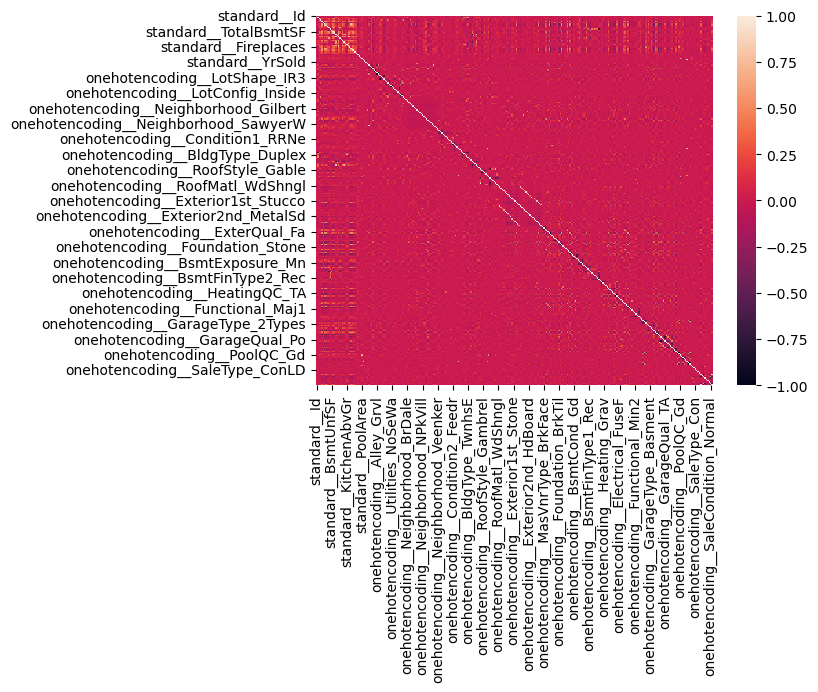

In [401]:
sns.heatmap(X_train6.corr())

In [404]:
X_train6.join(y_train).corr()['SalePrice']

standard__Id                            -0.021917
standard__MSSubClass                    -0.084284
standard__LotFrontage                    0.334901
standard__LotArea                        0.263843
standard__OverallQual                    0.790982
                                           ...   
onehotencoding__SaleCondition_Alloca    -0.015525
onehotencoding__SaleCondition_Family    -0.046480
onehotencoding__SaleCondition_Normal    -0.153990
onehotencoding__SaleCondition_Partial    0.352060
SalePrice                                1.000000
Name: SalePrice, Length: 289, dtype: float64

In [405]:
# what we can do here is find out the relation of each numerical column w.r.t target column and see if we should consider them while calculating or not

# what type of relation they have with the target column

In [ ]:
for i in numerical_columns_training:
    df.

In [406]:
numerical_columns_training

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [408]:
X_train6.columns

Index(['standard__Id', 'standard__MSSubClass', 'standard__LotFrontage',
       'standard__LotArea', 'standard__OverallQual', 'standard__OverallCond',
       'standard__YearBuilt', 'standard__YearRemodAdd', 'standard__MasVnrArea',
       'standard__BsmtFinSF1',
       ...
       'onehotencoding__SaleType_ConLw', 'onehotencoding__SaleType_New',
       'onehotencoding__SaleType_Oth', 'onehotencoding__SaleType_WD',
       'onehotencoding__SaleCondition_Abnorml',
       'onehotencoding__SaleCondition_AdjLand',
       'onehotencoding__SaleCondition_Alloca',
       'onehotencoding__SaleCondition_Family',
       'onehotencoding__SaleCondition_Normal',
       'onehotencoding__SaleCondition_Partial'],
      dtype='object', length=288)

In [415]:
X_train7 = X_train6.copy()

In [427]:
for i in X_train7.columns:
    if 'standard__' in i:
        X_train7.rename(columns={i:i.replace('standard__', '')}, inplace=True)
    elif 'onehotencoding__' in i:
        X_train7.rename(columns={i:i.replace('onehotencoding__', '')}, inplace=True)

In [434]:
X_test7 = X_test6.copy()

In [462]:
for i in X_test7.columns:
    if 'standard__' in i:
        X_test7.rename(columns={i:i.replace('standard__', '')}, inplace=True)
    elif 'onehotencoding__' in i:
        X_test7.rename(columns={i:i.replace('onehotencoding__', '')}, inplace=True)

# X_train7 and X_test7 is the final data

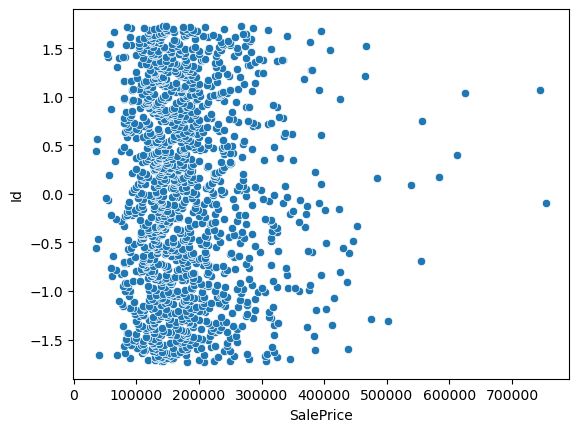

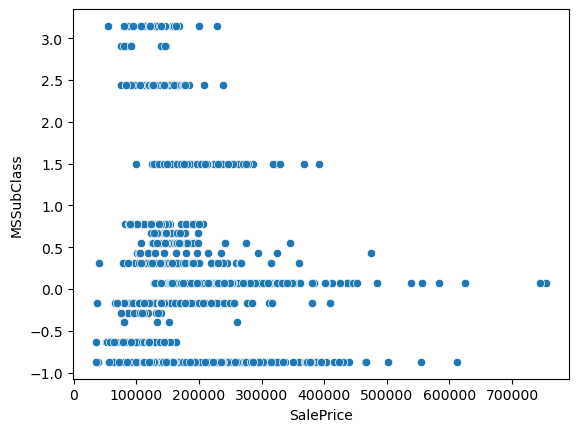

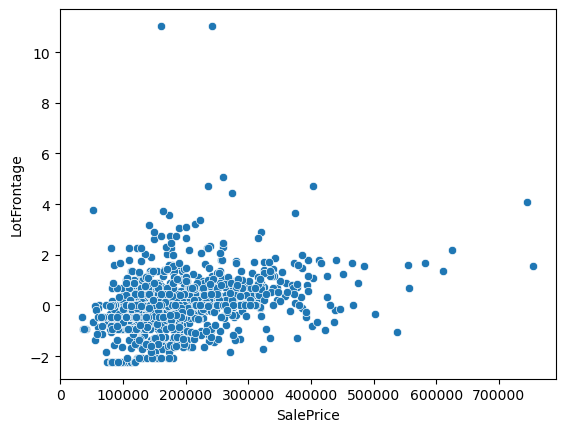

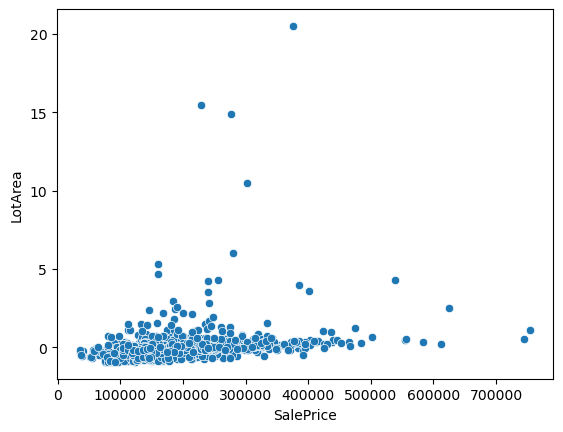

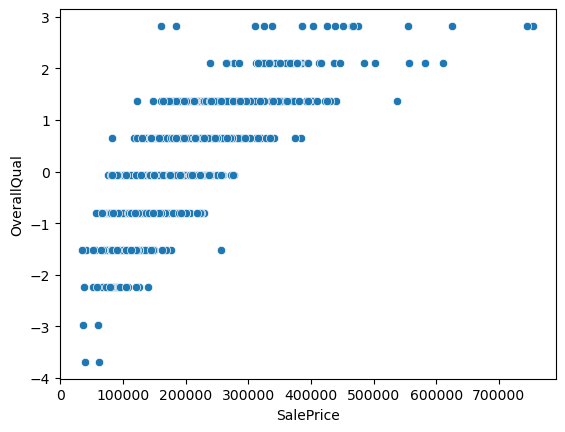

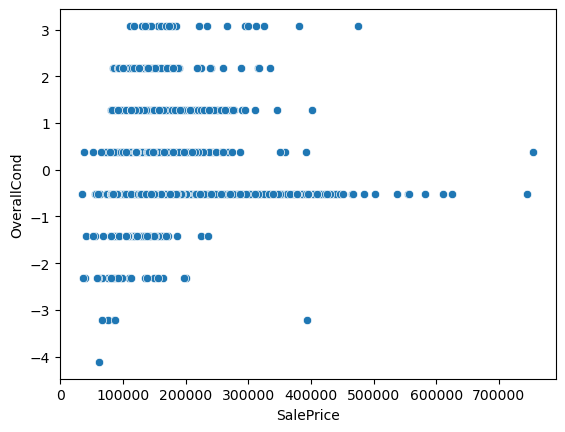

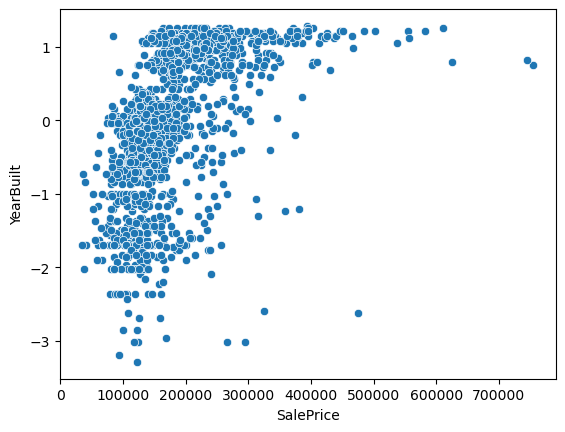

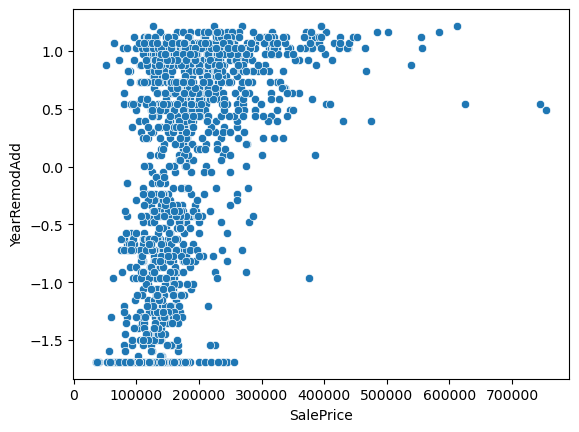

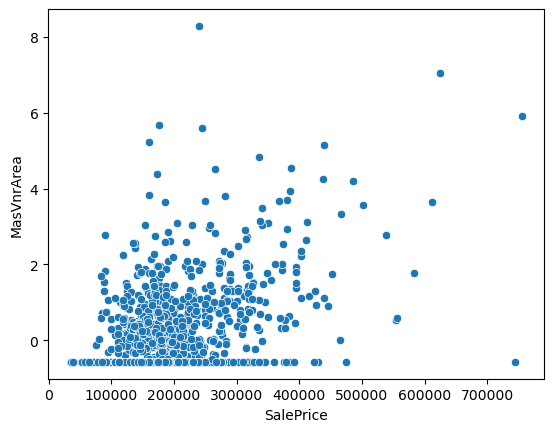

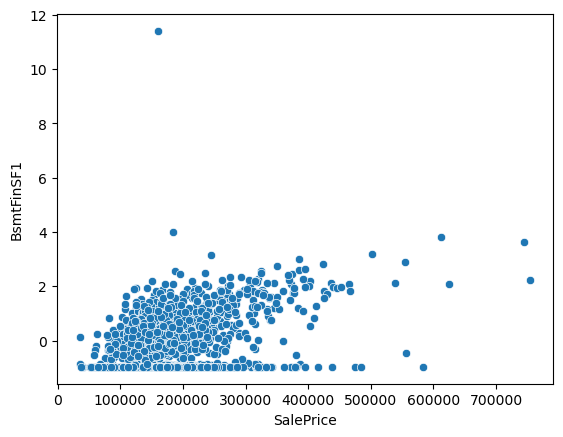

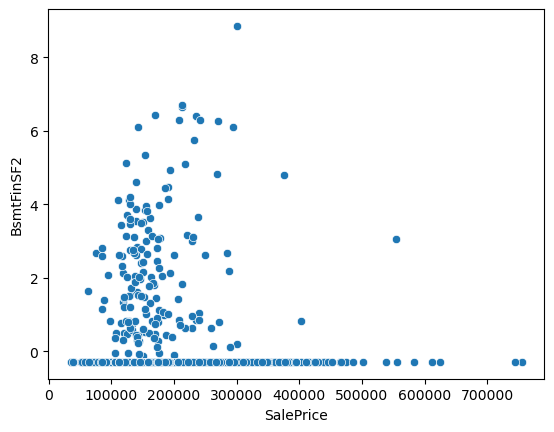

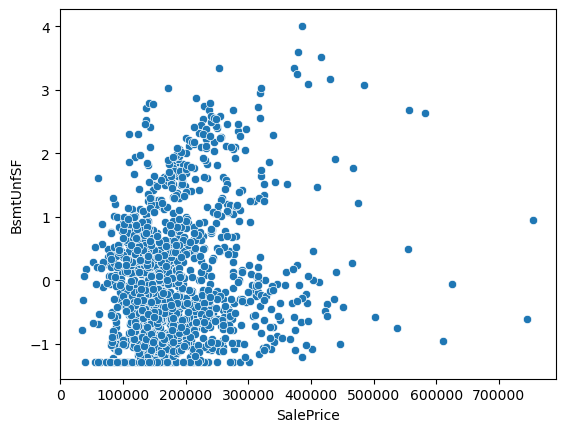

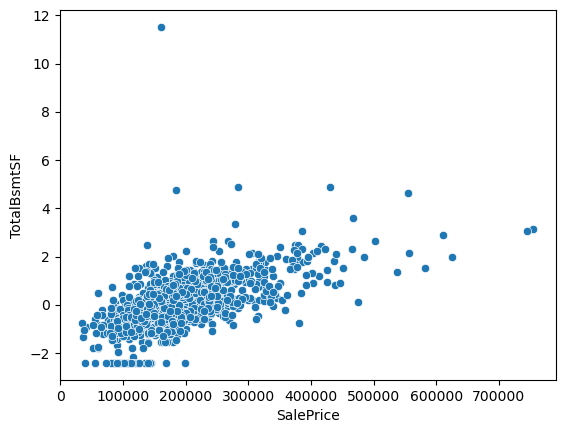

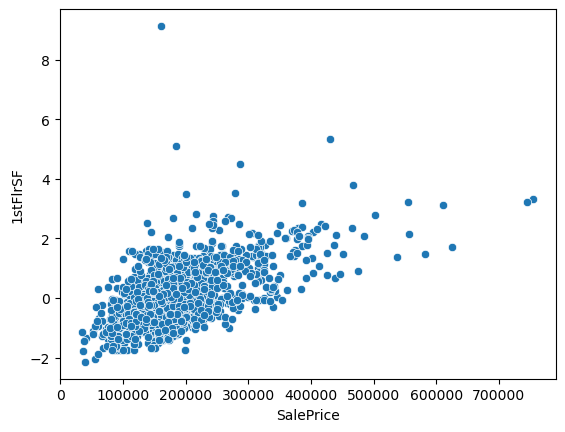

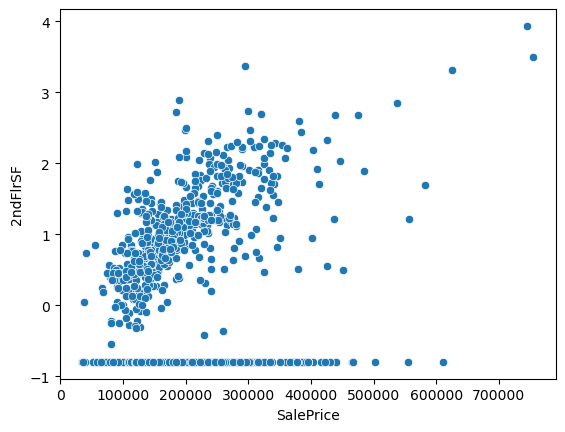

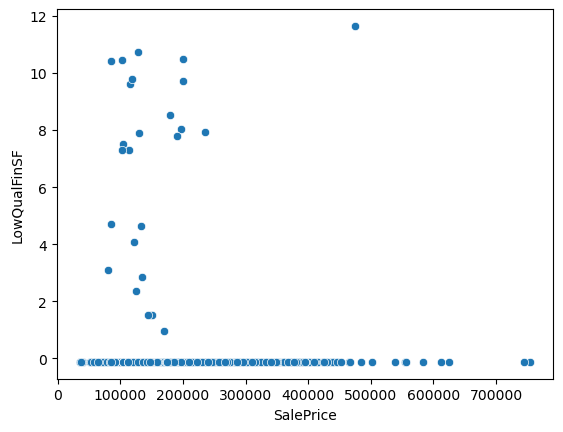

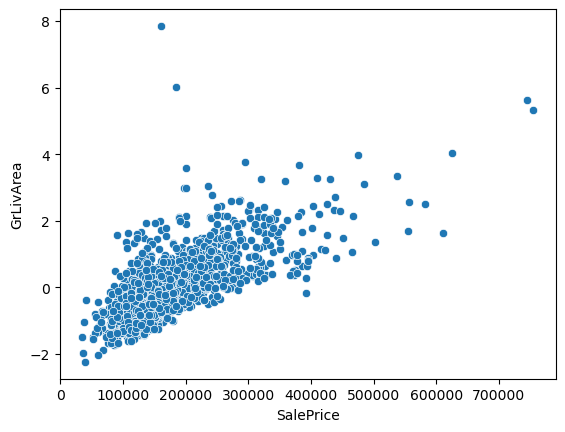

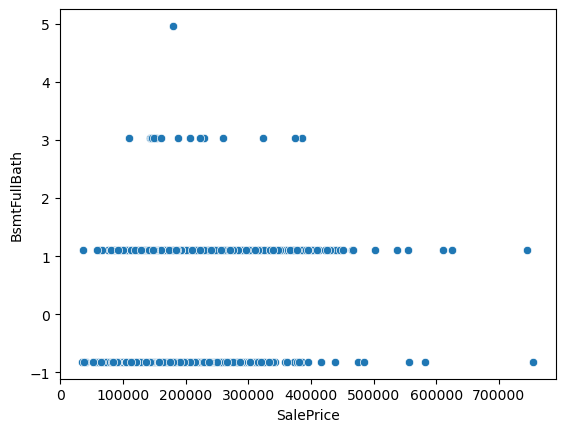

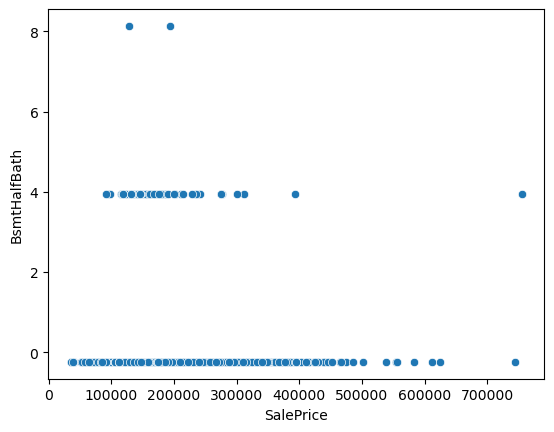

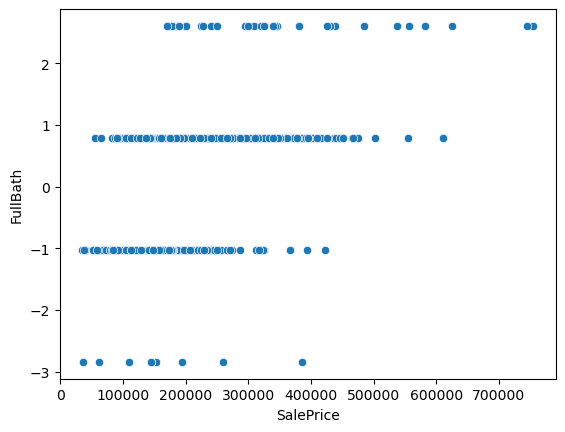

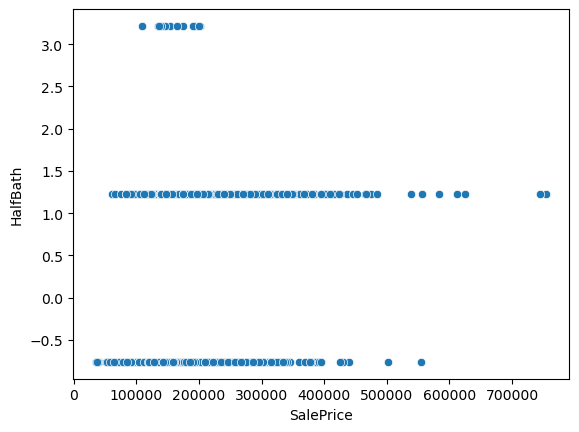

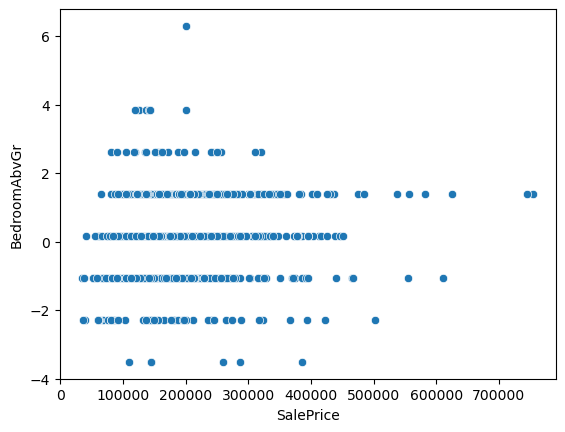

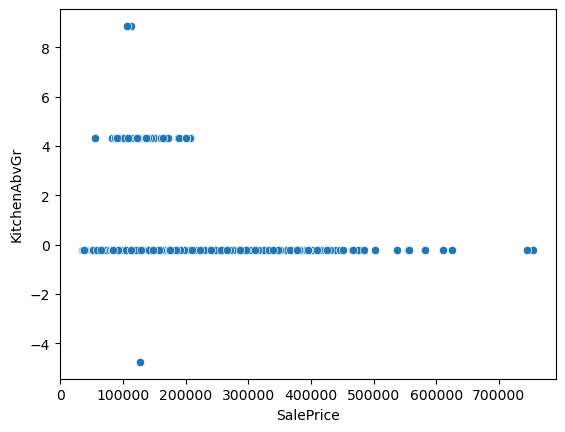

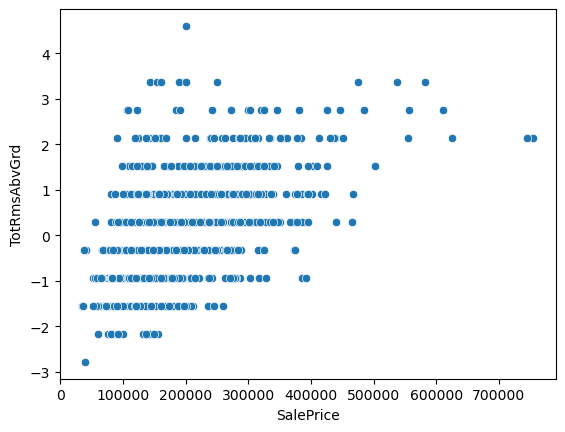

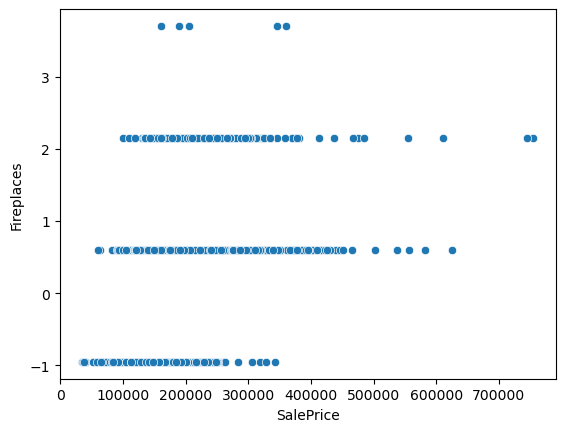

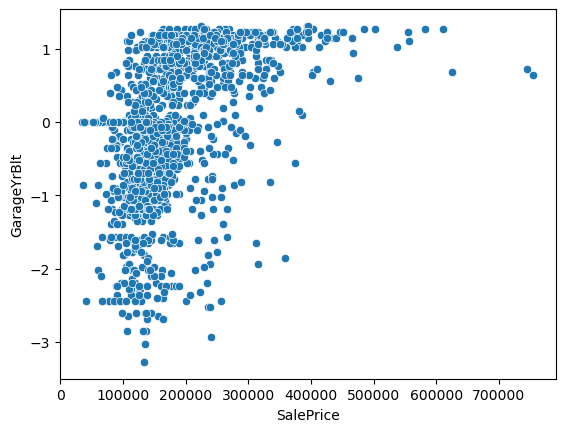

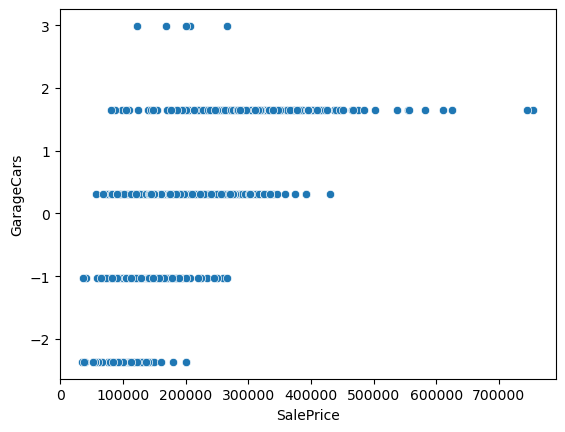

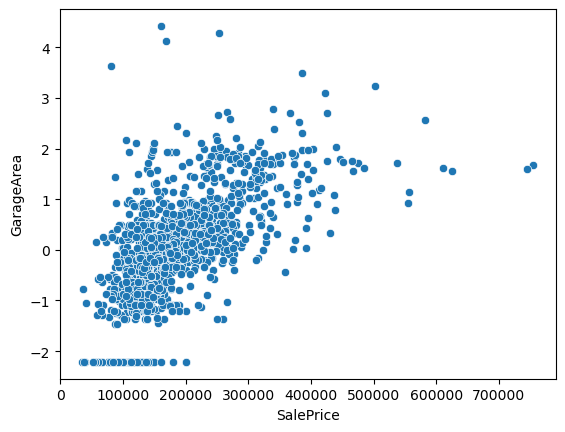

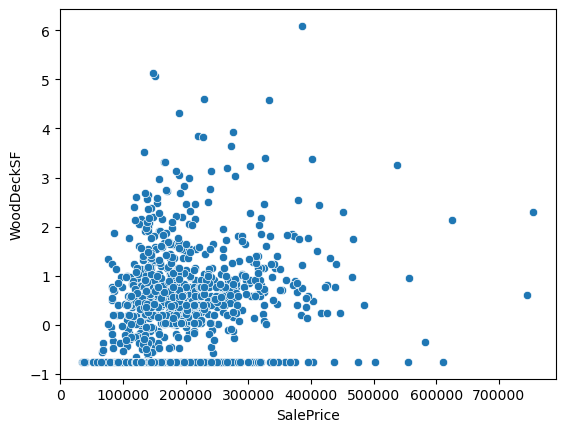

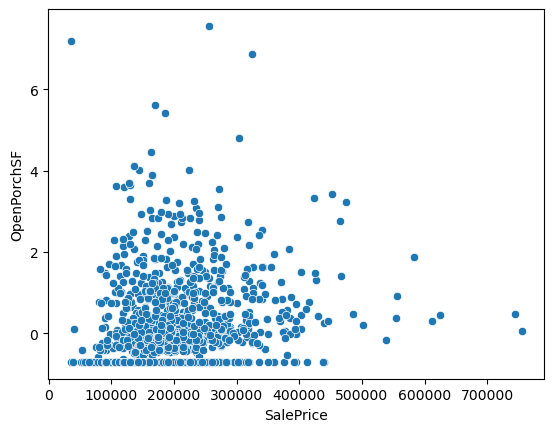

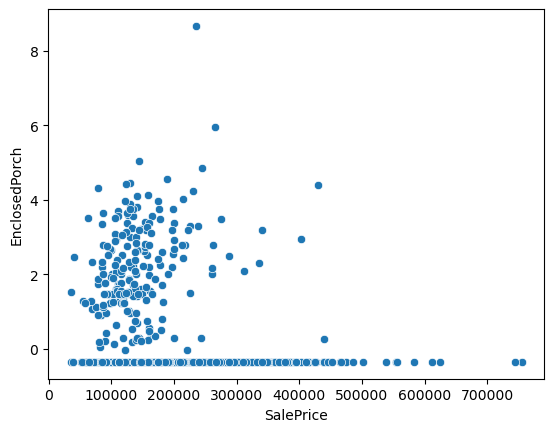

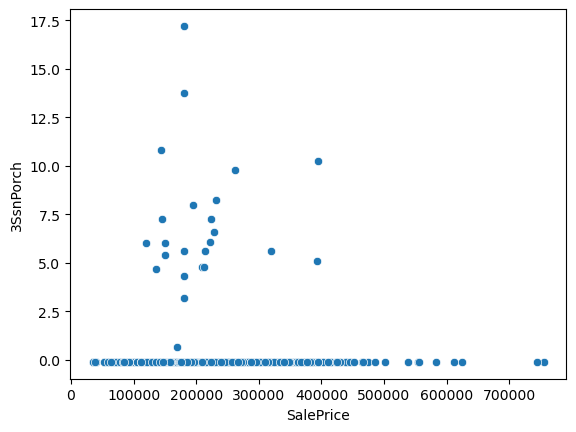

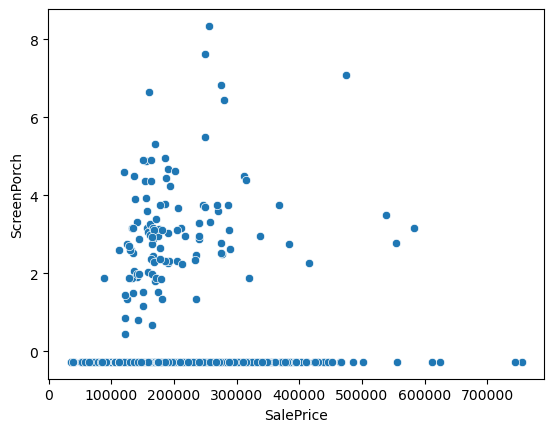

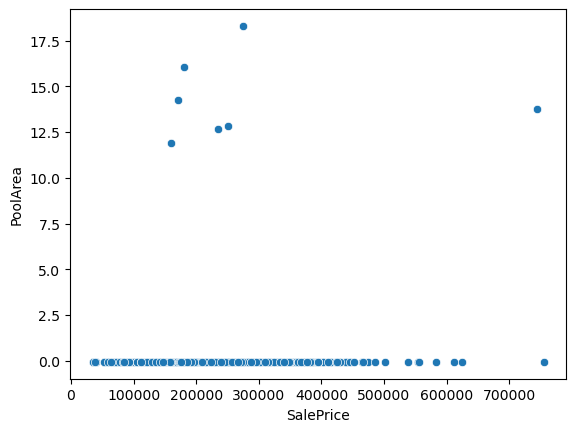

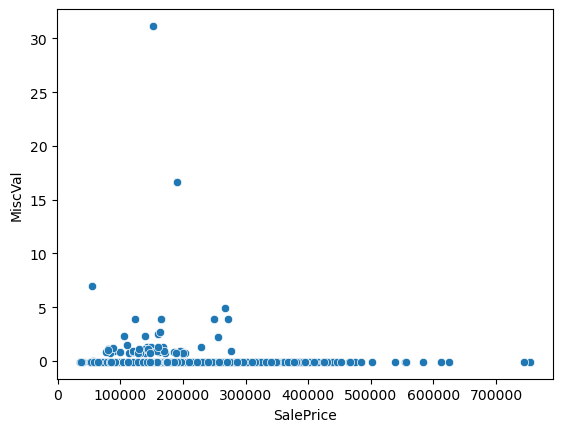

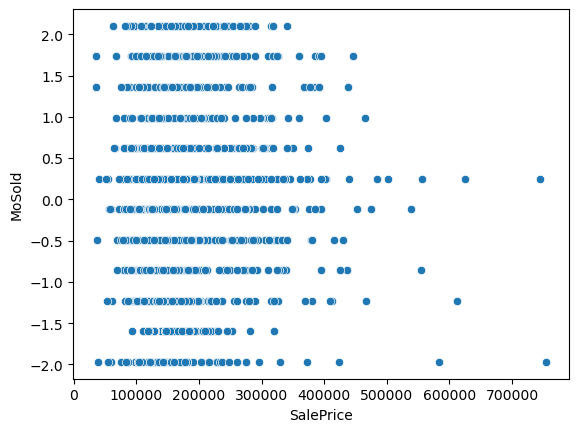

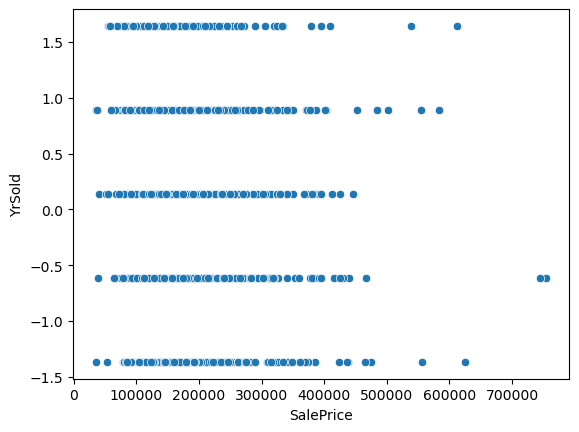

In [446]:
for i in X_train7[numerical_columns_training].columns:
    sns.scatterplot(y=X_train7[i], x=y_train)
    plt.show();

### X_train7 and X_test7 final data

In [451]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [452]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [453]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [454]:
lr = LinearRegression()

In [456]:
lr.fit(X_train7, y_train)

LinearRegression()

In [458]:
lr.intercept_, lr.coef_

(-5.080327816469125e+16,
 array([ 5.05248457e+02, -1.68957921e+03,  1.04245951e+03,  7.45473138e+03,
         9.06049075e+03,  6.50409514e+03,  9.49373807e+03,  1.93069328e+03,
         2.97745738e+03, -2.43744305e+16, -8.62109594e+15, -2.36139015e+16,
         2.34449401e+16,  2.88880601e+15,  3.26199164e+15,  3.63339641e+14,
        -3.92669177e+15,  3.70962741e+02, -1.87490743e+02,  2.30980665e+03,
         7.77540894e+02, -3.05528076e+03, -2.99254144e+03,  2.48373994e+03,
         1.88420720e+03,  2.85762361e+02,  1.98785561e+03,  3.30543882e+03,
         1.85135128e+03,  3.77645680e+02,  2.75412424e+02,  9.13522006e+02,
         1.86389270e+03,  5.89162124e+03,  2.06067191e+03, -1.14630039e+03,
        -4.89308479e+02,  3.78818198e+15,  3.78818198e+15,  3.78818198e+15,
         3.78818198e+15,  3.78818198e+15, -2.62404771e+15, -2.62404771e+15,
         1.28953747e+15,  1.28953747e+15,  1.99004718e+15,  1.99004718e+15,
         1.99004718e+15,  1.99004718e+15, -3.15520092e+15, -3.1

In [464]:
r2_score(y_test, lr.predict(X_test7))

-2.410753851377058e+19

In [ ]:
### Random 

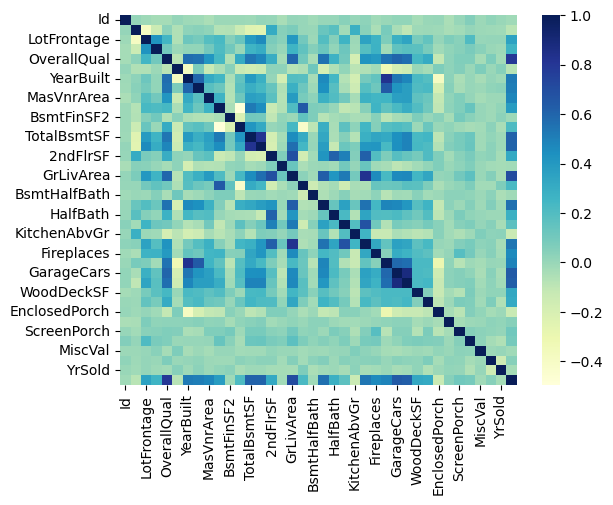

In [471]:
training = X_train.join(y_train)

sns.heatmap(training.corr(numeric_only=True), cmap='YlGnBu')
plt.show();

In [470]:
X_train.join(y_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [473]:
X_train.dtype

dtype('int64')

In [474]:
X_train.select_dtypes(include=['int64','float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [ ]:
#

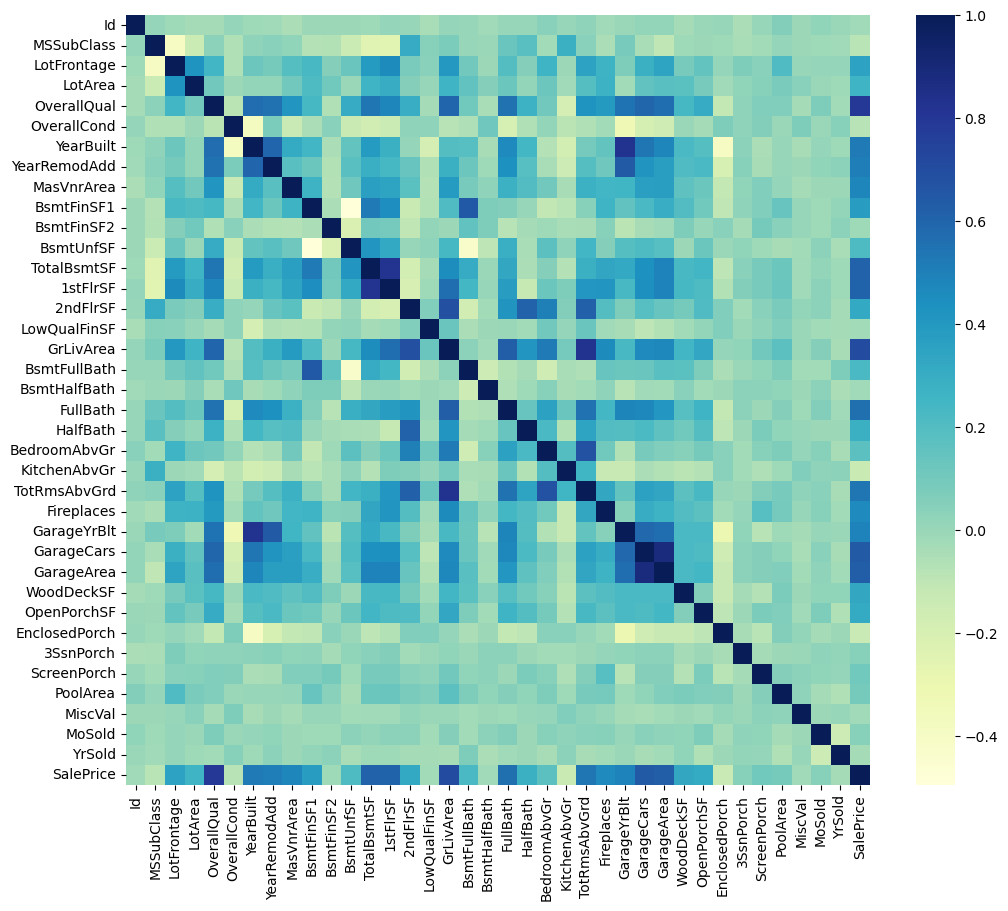

In [484]:
plt.figure(figsize=(12,10))
sns.heatmap(training[numerical_columns_training+['SalePrice']].corr(), cmap='YlGnBu')
plt.show();

In [480]:
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [478]:
numerical_columns_training + ['SalesPrice']

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalesPrice']

In [489]:
training.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [490]:
# We have to select those columns with high absolute mean value, generally we select a threshold of 0.3 and above.

# there could be chances where if the features have high collinearity then it can lead to multicollinearity, to avoid this we use VIF(variance inflation vector)

# we can use cross-validation to check model performance|

In [491]:
from scipy.stats import chi2_contingency

In [494]:
pd.crosstab(X_train[categorical_columns_training], y_train)

ValueError: 2

In [493]:
len(categorical_columns_training)

43

### the first and foremost step for doing any ML project should be to first understand what is the data and what we have to find(target column)

In [495]:
# first you should start with target column and understand everything about it.

# in our case it's SalePrice so we have to understand everything about it.

# for example in our data we have to predict the price of an apartment or zameen ka price pta lagana hai

# to predict the price there are several factors which affects the price

# to my understanding kya kya hai vo factors=== location, yearsold, totalrooms, view(again location)[neighbors location], aur bhi pta nhi kya kya

In [ ]:
# first we will see how the SalePrice columns look like